## TAsk - 1: Machine Learning

### Dataset La Liga - Original

In [ ]:
#############
# Librerías #
#############

# -----------------------------------------
# Generales: Menejo de data y Visualización  
# -----------------------------------------
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import random
import re
import seaborn as sns
import sqlite3

# -----------------------------------------
# Generales: Sklearn  
# -----------------------------------------

# ---- split data
from sklearn.model_selection import train_test_split 

# ---- multiclass classification
from sklearn.preprocessing import LabelEncoder

# ---- Métricas problema de classificación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, f1_score

# ---- Métricas problema continuo (regresor)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

# ---- Encoder and Scaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from category_encoders import CatBoostEncoder

# ---- Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# ---- Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# ---- Xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.utils.class_weight import compute_sample_weight

# ---- SVM
from sklearn.svm import SVC
from sklearn.svm import SVR

# ---- Tunning Hiperparámetros
from sklearn.model_selection import GridSearchCV

# ---- Redes neuronales 
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import visualkeras
from sklearn.utils.class_weight import compute_class_weight

In [81]:
#############
# Read Data #
#############

# Conectar a la base
conn = sqlite3.connect(r"C:\Users\valeu\Desktop\Proyecto Estel\Master UAB\RI\LaLiga\la-quiniela-main\la-quiniela-main\laliga.sqlite")


# Leer la tabla Matches
df = pd.read_sql_query("SELECT * FROM Matches;", conn)

# Exportar a CSV
df.to_csv("matches.csv", index=False)

# Cerrar conexión
conn.close()

print(" Archivo 'matches.csv' exportado correctamente.")

# Leer el CSV
df = pd.read_csv(r"C:\Users\valeu\Desktop\Proyecto Estel\Master UAB\RI\LaLiga\matches.csv")
df.head()

 Archivo 'matches.csv' exportado correctamente.


season  division  matchday     date time    home_team        away_team  \
0  1928-1929         1         1  2/10/29  NaN  Arenas Club  Athletic Madrid   
1  1928-1929         1         1  2/10/29  NaN     Espanyol       Real Unión   
2  1928-1929         1         1  2/10/29  NaN  Real Madrid        Catalunya   
3  1928-1929         1         1  2/10/29  NaN     Donostia         Athletic   
4  1928-1929         1         1  2/12/29  NaN       Racing        Barcelona   

  score  
0   2:3  
1   3:2  
2   5:0  
3   1:1  
4   0:2

In [82]:
#######
# EDA #
#######

# ----------------------
# Shape 
# ----------------------

print(df.shape)

(48780, 8)


In [83]:
# ----------------------
# TAIL #
# ----------------------

df.tail()

season  division  matchday     date time        home_team  \
48775  2021-2022         2        42  5/29/22  NaN      Real Oviedo   
48776  2021-2022         2        42  5/29/22  NaN  Real Sociedad B   
48777  2021-2022         2        42  5/29/22  NaN   Sporting Gijón   
48778  2021-2022         2        42  5/29/22  NaN      CD Tenerife   
48779  2021-2022         2        42  5/29/22  NaN  Real Valladolid   

           away_team score  
48775       UD Ibiza   NaN  
48776  Real Zaragoza   NaN  
48777  UD Las Palmas   NaN  
48778   FC Cartagena   NaN  
48779      SD Huesca   NaN

In [84]:
# ----------------------
# Info
# ----------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48780 entries, 0 to 48779
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   season     48780 non-null  object
 1   division   48780 non-null  int64 
 2   matchday   48780 non-null  int64 
 3   date       48780 non-null  object
 4   time       16730 non-null  object
 5   home_team  48780 non-null  object
 6   away_team  48780 non-null  object
 7   score      48000 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


In [85]:
# ------------------------------------
# Treatment of Dtype of variables
# ------------------------------------

# ------------------
# date to datetime
# ------------------

# asegurar que la columna date existe
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%m/%d/%y')

# corregir años futuros (por ejemplo 2028 → 1928)
df.loc[df['date'] > pd.Timestamp('2025-01-01'), 'date'] = df.loc[df['date'] > pd.Timestamp('2025-01-01'), 'date'] - pd.DateOffset(years=100)

# verificar tipo y rango
print("Tipo de dato:", df['date'].dtype)
print("Fecha más antigua:", df['date'].min().date())
print("Fecha más reciente:", df['date'].max().date())

Tipo de dato: datetime64[ns]
Fecha más antigua: 1929-02-10
Fecha más reciente: 2022-05-29


In [86]:
# ------------------
# check
# ------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48780 entries, 0 to 48779
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   season     48780 non-null  object        
 1   division   48780 non-null  int64         
 2   matchday   48780 non-null  int64         
 3   date       48780 non-null  datetime64[ns]
 4   time       16730 non-null  object        
 5   home_team  48780 non-null  object        
 6   away_team  48780 non-null  object        
 7   score      48000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 3.0+ MB


Total of missing values: 32830
Missing values by columns: 
 season           0
division         0
matchday         0
date             0
time         32050
home_team        0
away_team        0
score          780
dtype: int64


<Axes: title={'center': '% of missing values by colums'}>

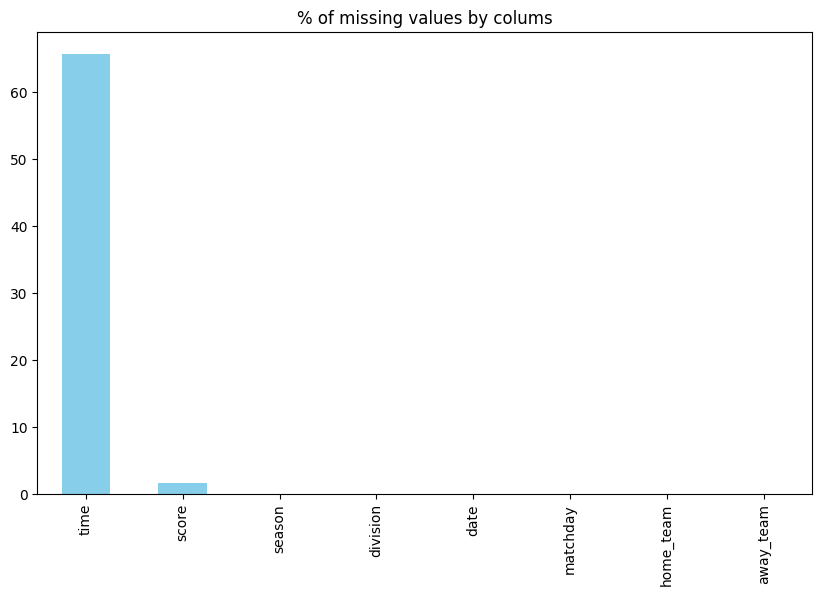

In [87]:
# ----------------------
# NA's
# ----------------------

# total of Na´s
print(f"Total of missing values: {df.isna().sum().sum()}")

# verification of missing values by columns
print(f"Missing values by columns: \n {df.isna().sum()}")

# plot of missing values
df.isnull().mean().mul(100).sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='skyblue', title='% of missing values by colums')

In [88]:
# ----------------------
# Treatment of NA's
# ----------------------

# delete colum time 
df = df.drop("time", axis=1)

In [89]:
# column score
print(f"Los valores nulos en 'score' van desde {df.loc[df['score'].isna(), 'date'].min().date()} hasta {df.loc[df['score'].isna(), 'date'].max().date()}.")

Los valores nulos en 'score' van desde 2021-08-30 hasta 2022-05-29.


In [90]:
# ----------------------
# Duplicates
# ----------------------

# duplicated values
print(f"Total of values duplicates: {df.duplicated().sum()}")

Total of values duplicates: 0


In [91]:
##########################
# Preparación de la data #
##########################

# -------------------------------------------
# Create two columns: home and away goals
# -------------------------------------------

df[['home_goals', 'away_goals']] = df['score'].str.split(':', expand=True)
df['home_goals'] = pd.to_numeric(df['home_goals'], errors='coerce')
df['away_goals'] = pd.to_numeric(df['away_goals'], errors='coerce')

# -------------------------------------------
# Column Result
# -------------------------------------------

def get_result(row):
    if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
        return None
    elif row['home_goals'] > row['away_goals']:
        return '0'   # win home team
    elif row['home_goals'] < row['away_goals']:
        return '1'   # win away team
    else:
        return '2'   # tie

df['result'] = df.apply(get_result, axis=1)

# -------------------------------------------
# Final Visualization
# -------------------------------------------
df.head(10)

season  division  matchday       date        home_team        away_team  \
0  1928-1929         1         1 1929-02-10      Arenas Club  Athletic Madrid   
1  1928-1929         1         1 1929-02-10         Espanyol       Real Unión   
2  1928-1929         1         1 1929-02-10      Real Madrid        Catalunya   
3  1928-1929         1         1 1929-02-10         Donostia         Athletic   
4  1928-1929         1         1 1929-02-12           Racing        Barcelona   
5  1928-1929         1         2 1929-02-17        Barcelona      Real Madrid   
6  1928-1929         1         2 1929-02-17         Athletic         Espanyol   
7  1928-1929         1         2 1929-02-17  Athletic Madrid         Donostia   
8  1928-1929         1         2 1929-02-17       Real Unión           Racing   
9  1928-1929         1         2 1929-02-17        Catalunya      Arenas Club   

  score  home_goals  away_goals result  
0   2:3         2.0         3.0      1  
1   3:2         3.0         2.0      0  
2   5:0         5.0         0.0      0  
3   1:1         1.0         1.0      2  
4   0:2         0.0         2.0      1  
5   1:2         1.0         2.0      1  
6   9:0         9.0         0.0      0  
7   0:3         0.0         3.0      1  
8   3:1         3.0         1.0      0  
9   5:2         5.0         2.0      0

In [92]:
# -------------------------------------------
# Target count
# -------------------------------------------
df["result"].value_counts()     # 0: win home team
                                # 1: win away team
                                # 2: tie

result
0    25321
2    12280
1    10399
Name: count, dtype: int64

### Machine Learning Models:

#### Split Data:

In [93]:
##############
# Split Data #
##############

# ------------------------------------
# Train / Test / Predict Split
# ------------------------------------

# 1) Rango nulo
fecha_ini = pd.Timestamp('2021-08-30')
fecha_fin = pd.Timestamp('2022-05-29')

# 2) Trainable (para train/test)
df_trainable = df[df['date'] < fecha_ini].dropna(subset=['result'])

# 3) A predecir (nulos en el rango)
df_to_predict = df[
    (df['date'] >= fecha_ini) & (df['date'] <= fecha_fin) & (df['result'].isna())
].drop(columns=['score', 'result', 'home_goals', 'away_goals', 'date'])

# 4) X, y (features and target)
X = df_trainable.drop(columns=['score', 'result', 'home_goals', 'away_goals', 'date'])
y = df_trainable['result'].astype(int)

# 5) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6) Visualización Inicial 
print("Tamaño train (raw):", X_train.shape)
print("Tamaño test (raw):", X_test.shape)
print("Tamaño a predecir (raw nulos):", df_to_predict.shape)

# ------------------------------------
# Target Encoding para categóricas
# ------------------------------------

# 1) Detectar columnas categóricas desde el TRAIN
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 2) Encoder estilo CatBoost (fit SOLO con train)
cbe = CatBoostEncoder(cols=cat_cols, random_state=42)
cbe.fit(X_train, y_train)

# 3) Alinear df_to_predict a las MISMAS columnas y orden que X
X_to_predict_base = df_to_predict.reindex(columns=X.columns)

# 4) Transformar train, test y a predecir con el MISMO encoder
X_train = cbe.transform(X_train).fillna(0)
X_test  = cbe.transform(X_test).fillna(0)
X_to_predict = cbe.transform(X_to_predict_base).fillna(0)

print("-----------------------------------------------------")
print("Tamaño train (enc):", X_train.shape)
print("Tamaño test (enc):", X_test.shape)
print("Tamaño a predecir (enc nulos):", X_to_predict.shape)

# ------------------------------------
# Escalado Min-Max (sin data leakage)
# ------------------------------------
from sklearn.preprocessing import MinMaxScaler

# 1) Definir y ajustar el scaler SOLO con TRAIN
scaler = MinMaxScaler()
scaler.fit(X_train)  # <- fit únicamente con datos de entrenamiento

# 2) Transformar train, test y a predecir con el MISMO scaler
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns,  index=X_test.index)
X_to_predict = pd.DataFrame(scaler.transform(X_to_predict), columns=X_to_predict.columns, index=X_to_predict.index)

print("-----------------------------------------------------")
print("Tamaño train (scaled):", X_train.shape)
print("Tamaño test (scaled):", X_test.shape)
print("Tamaño a predecir (scaled nulos):", X_to_predict.shape)

Tamaño train (raw): (38400, 5)
Tamaño test (raw): (9600, 5)
Tamaño a predecir (raw nulos): (780, 5)
-----------------------------------------------------
Tamaño train (enc): (38400, 5)
Tamaño test (enc): (9600, 5)
Tamaño a predecir (enc nulos): (780, 5)
-----------------------------------------------------
Tamaño train (scaled): (38400, 5)
Tamaño test (scaled): (9600, 5)
Tamaño a predecir (scaled nulos): (780, 5)


In [94]:
#######################
# Value counts target #
#######################

print("Value counts y_train:", y_train.value_counts())
print("\n")
print("Value counts y_test:", y_test.value_counts())

Value counts y_train: result
0    20257
2     9824
1     8319
Name: count, dtype: int64


Value counts y_test: result
0    5064
2    2456
1    2080
Name: count, dtype: int64


#### Decision Tree:

In [95]:
# --------------------------------
# Definir Modelo (Tunning)
# --------------------------------

# Definir el modelo de DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Definir la cuadrícula de parámetros a probar
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criterio de la división
    'max_depth': [None, 3, 5],  # Profundidad máxima
    'min_samples_split': np.arange(2, 9, 2),  # Mínimo número de muestras para dividir
    'min_samples_leaf': np.arange(1, 9, 2),  # Mínimo número de muestras en una hoja
    'max_features': ['sqrt', 'log2', None],  # Número máximo de características a considerar
    'max_leaf_nodes': [None, 10],  # Número máximo de nodos hoja
    'ccp_alpha': [0.0, 0.01]  # Cost complexity pruning alpha (nivel de poda del árbol)
}

# Realizar GridSearchCV con validación cruzada (5 pliegues)
grid_search_dt = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid_dt,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_dt.fit(X_train, y_train)

# Mostrar el mejor modelo y los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search_dt.best_params_)
print("Mejor modelo encontrado:", grid_search_dt.best_estimator_)

# Obtener el mejor modelo
best_model_dt = grid_search_dt.best_estimator_

# Predecir el conjunto de test usando el mejor modelo encontrado
y_pred_dt = best_model_dt.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy Decision Tree (Hyperparameter Tuning): {accuracy_dt:.4f}')

Mejores parámetros encontrados: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}
Mejor modelo encontrado: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2), random_state=42)
Accuracy Decision Tree (Hyperparameter Tuning): 0.4412


Feature Importances:
 home_team    0.387376
away_team    0.332562
season       0.261617
division     0.018446
matchday     0.000000
dtype: float64


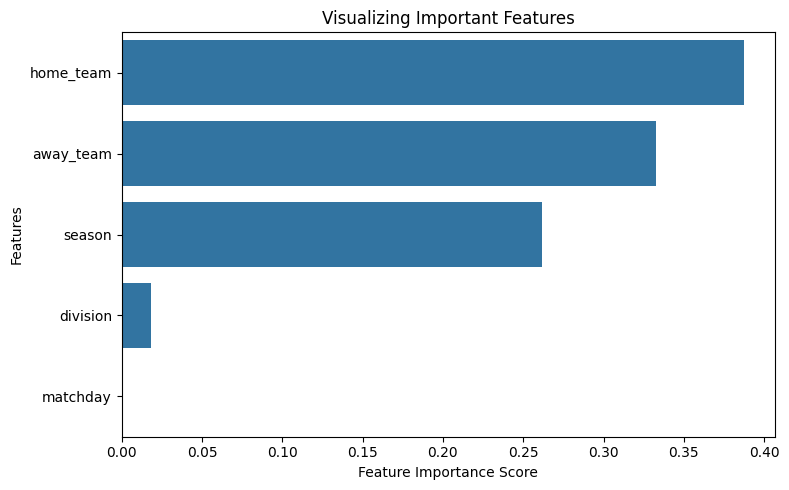

In [96]:
# --------------------------------------------------
# Feature importances (usar el modelo entrenado)
# --------------------------------------------------

# features importances
importances = best_model_dt.feature_importances_

# name columns
feature_names = getattr(X_train, "columns", [f"f{i}" for i in range(len(importances))])
feature_scores = (
    pd.Series(importances, index=feature_names)
      .sort_values(ascending=False)
)

print('Feature Importances:\n', feature_scores)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()

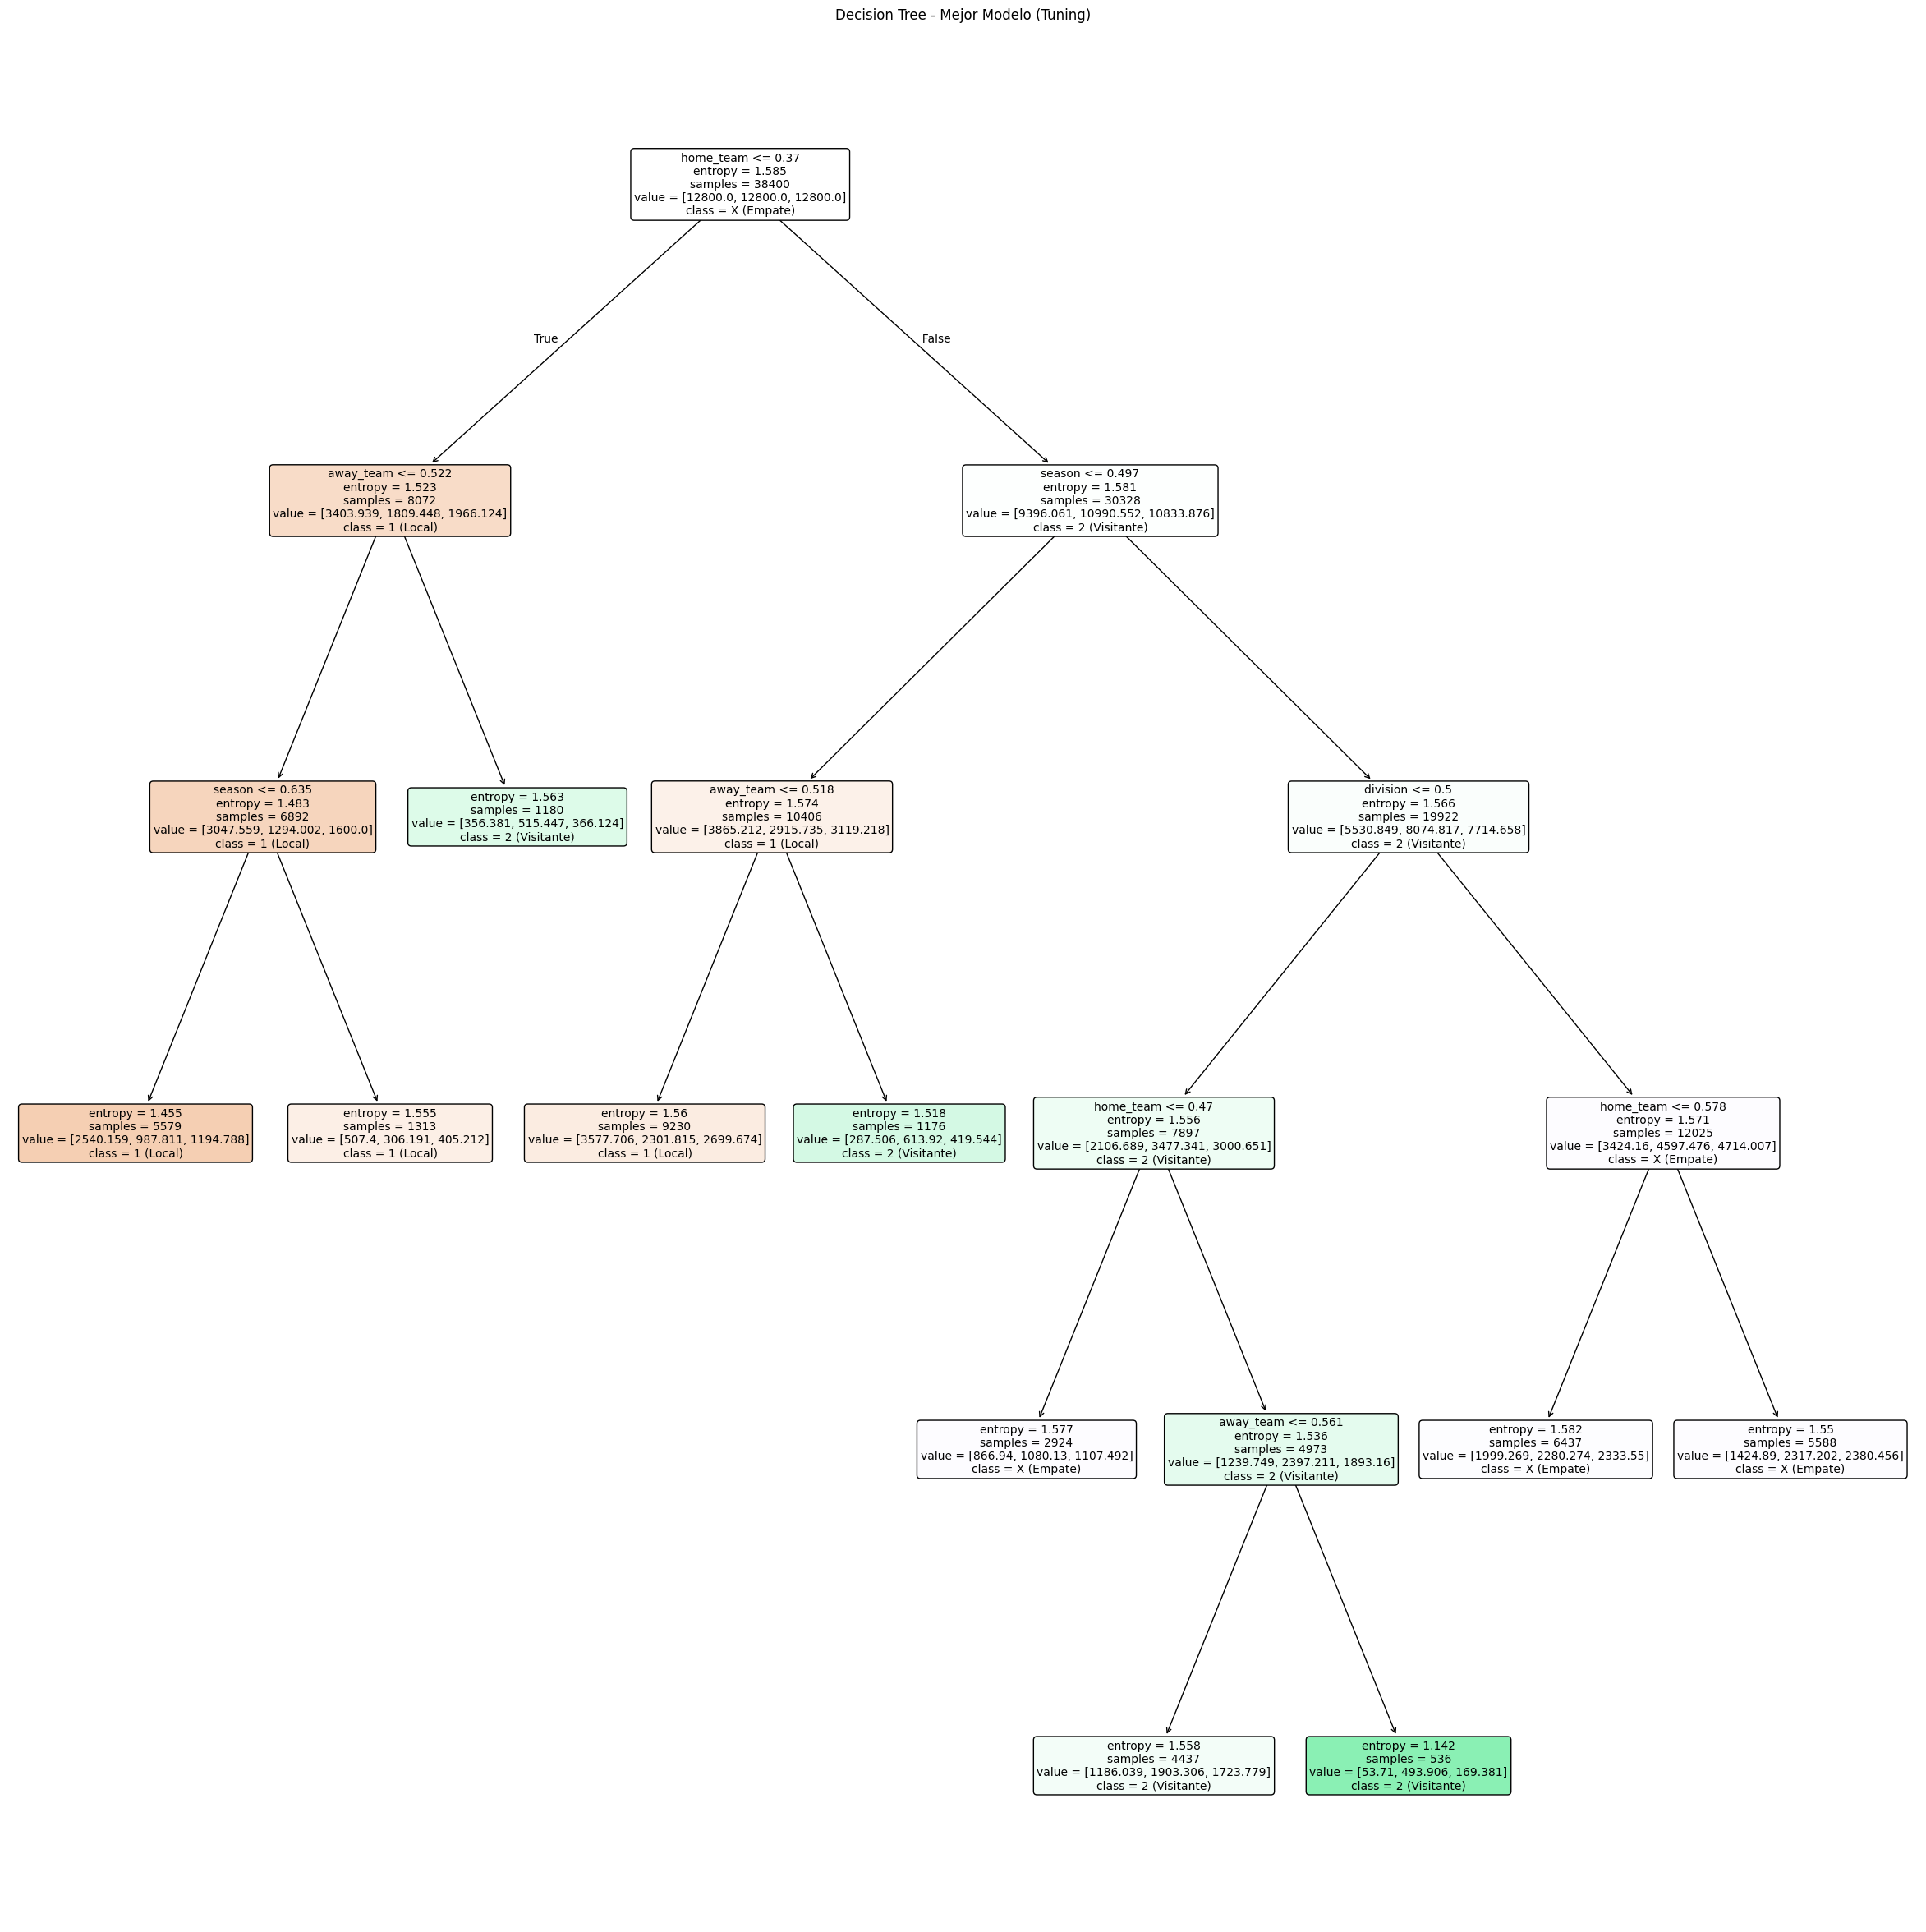

In [97]:
# --------------------------------
# PLot Tree
# --------------------------------
plt.figure(figsize=(30, 30))
plot_tree(
    best_model_dt,
    filled=True,
    feature_names=X.columns,
    class_names=["1 (Local)", "2 (Visitante)", "X (Empate)"],
    rounded=True,
    fontsize=10  # puedes subirlo a 12–14 si aún se ve chico
)
plt.title("Decision Tree - Mejor Modelo (Tuning)")
plt.show()

In [98]:
# --------------------------------
# Text Representation
# --------------------------------
text_representation_dt = export_text(best_model_dt, feature_names=list(X.columns))
print(text_representation_dt)

|--- home_team <= 0.37
|   |--- away_team <= 0.52
|   |   |--- season <= 0.64
|   |   |   |--- class: 0
|   |   |--- season >  0.64
|   |   |   |--- class: 0
|   |--- away_team >  0.52
|   |   |--- class: 1
|--- home_team >  0.37
|   |--- season <= 0.50
|   |   |--- away_team <= 0.52
|   |   |   |--- class: 0
|   |   |--- away_team >  0.52
|   |   |   |--- class: 1
|   |--- season >  0.50
|   |   |--- division <= 0.50
|   |   |   |--- home_team <= 0.47
|   |   |   |   |--- class: 2
|   |   |   |--- home_team >  0.47
|   |   |   |   |--- away_team <= 0.56
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- away_team >  0.56
|   |   |   |   |   |--- class: 1
|   |   |--- division >  0.50
|   |   |   |--- home_team <= 0.58
|   |   |   |   |--- class: 2
|   |   |   |--- home_team >  0.58
|   |   |   |   |--- class: 2



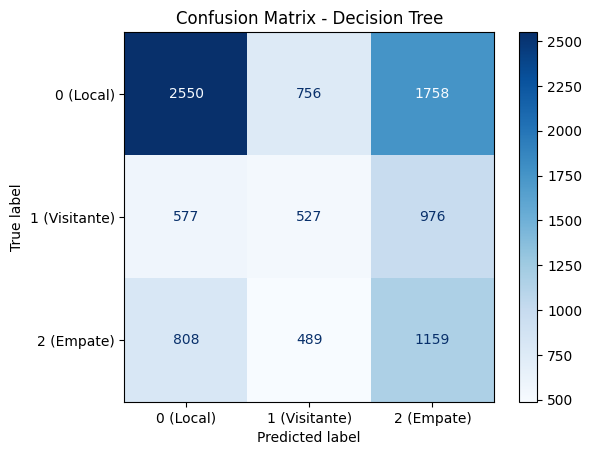

In [99]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=display_names)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [100]:
# --------------------------------
# Classification Report
# --------------------------------
print('Classification Report:\n', classification_report(y_test, y_pred_dt, labels=[0, 1, 2],target_names=["1 (Local)", "2 (Visitante)", "3 (Empate)"],digits=4))

Classification Report:
                precision    recall  f1-score   support

    1 (Local)     0.6480    0.5036    0.5667      5064
2 (Visitante)     0.2974    0.2534    0.2736      2080
   3 (Empate)     0.2977    0.4719    0.3651      2456

     accuracy                         0.4412      9600
    macro avg     0.4144    0.4096    0.4018      9600
 weighted avg     0.4824    0.4412    0.4516      9600



In [101]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_pred_new_dt = best_model_dt.predict(X_to_predict)

#### Random Forest:

In [102]:
# --------------------------------
# Definir Modelo (Tunning)
# --------------------------------

# 1) Definir el modelo
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 2) Cuadrícula de hiperparámetros
# param_grid_rf = {
#     'n_estimators': [100, 200],               # número de árboles
#     'criterion': ['gini', 'entropy'],         # función de impureza
#     'max_depth': [None, 5, 10],               # profundidad máxima
#     'min_samples_split': np.arange(2, 9, 2),  # mínimo de muestras para dividir
#     'min_samples_leaf': np.arange(1, 9, 2),   # mínimo de muestras por hoja
#     'max_features': ['sqrt', 'log2', None],   # número de features por split
#     'max_leaf_nodes': [None, 20, 50],         # nodos hoja máximos
#     'bootstrap': [True, False]                # si se usa bootstrap o no
# }

param_grid_rf = {
    'n_estimators': [200],        # suficiente para estabilidad sin disparar tiempo
    'criterion': ['gini'],        # 'gini' suele ser más rápido que 'entropy'
    'max_depth': [None, 10],      # sin límite o un tope razonable
    'min_samples_split': [2, 5],  # control de sobreajuste
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],     # estándar en clasificación
    'bootstrap': [True]           # permite OOB si lo usas
}

# 3) GridSearchCV (validación cruzada 5 pliegues)
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# 4) Ajustar el modelo
grid_search_rf.fit(X_train, y_train)

# 5) Resultados del tuning
print("Mejores parámetros encontrados:", grid_search_rf.best_params_)
print("Mejor modelo encontrado:", grid_search_rf.best_estimator_)

# 6) Evaluación
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Random Forest (Hyperparameter Tuning): {accuracy_rf:.4f}')

Mejores parámetros encontrados: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor modelo encontrado: RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)
Accuracy Random Forest (Hyperparameter Tuning): 0.4988


Feature Importances Random Forest:
 matchday     0.262316
season       0.247538
away_team    0.242514
home_team    0.231109
division     0.016522
dtype: float64


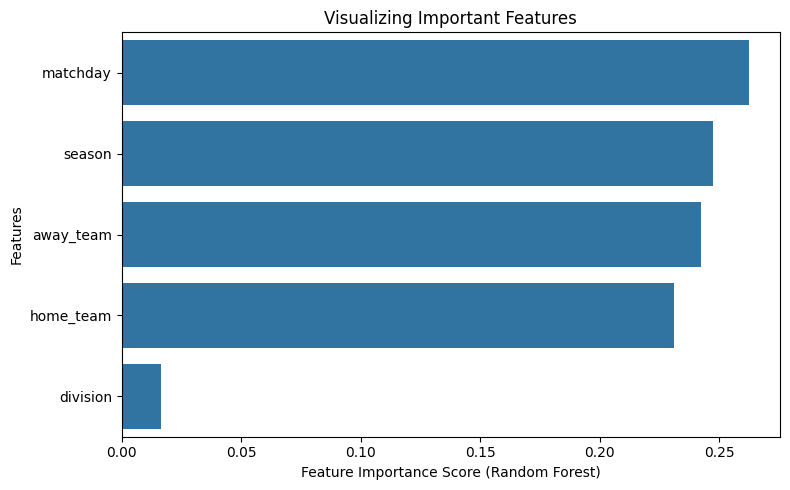

In [103]:
# --------------------------------------------------
# Feature importances (usar el modelo entrenado)
# --------------------------------------------------

# features importances
importances = best_model_rf.feature_importances_

# name columns
feature_names = getattr(X_train, "columns", [f"f{i}" for i in range(len(importances))])
feature_scores = (
    pd.Series(importances, index=feature_names)
      .sort_values(ascending=False)
)

print('Feature Importances Random Forest:\n', feature_scores)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.xlabel('Feature Importance Score (Random Forest)')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()

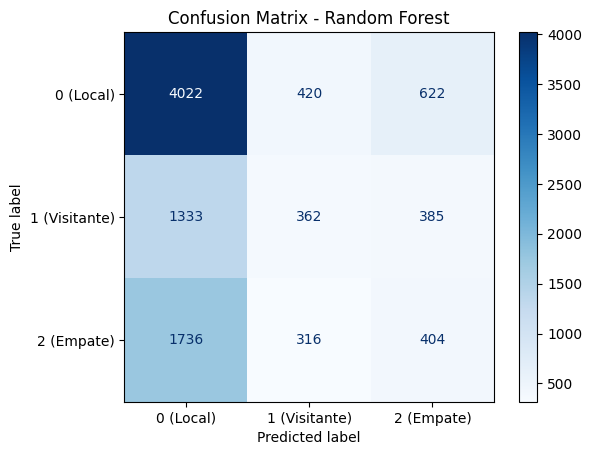

In [104]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=display_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [105]:
# --------------------------------
# Classification Report
# --------------------------------
print('Classification Report:\n', classification_report(y_test, y_pred_rf, labels=[0, 1, 2],target_names=["1 (Local)", "2 (Visitante)", "3 (Empate)"],digits=4))

Classification Report:
                precision    recall  f1-score   support

    1 (Local)     0.5672    0.7942    0.6618      5064
2 (Visitante)     0.3297    0.1740    0.2278      2080
   3 (Empate)     0.2863    0.1645    0.2089      2456

     accuracy                         0.4988      9600
    macro avg     0.3944    0.3776    0.3662      9600
 weighted avg     0.4439    0.4988    0.4519      9600



In [106]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_pred_new_rf = best_model_rf.predict(X_to_predict)

#### Xgboost:

In [107]:
# --------------------------------
# Definir Modelo (Tuning)
# --------------------------------

# Asegurar que las etiquetas sean int (CRÍTICO para XGBoost)
y_train = y_train.astype(int)   # <-- importante
y_test  = y_test.astype(int)    # <-- importante

# Calcular pesos de clase balanceados
weights = compute_sample_weight(class_weight='balanced', y=y_train)

# 1) Modelo base
model_xgb = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',     # métrica estándar para multiclase
    use_label_encoder=False
)

# 2) Cuadrícula de hiperparámetros
param_grid_xgb = {
    'objective': ['multi:softmax'],           # función objetivo multiclase
    'num_class': [len(np.unique(y_train))],   # número de clases detectado automáticamente
    'n_estimators': np.arange(100, 301, 100), # número de árboles
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


# 3) GridSearchCV (validación cruzada 5 pliegues)
grid_search_xgb = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 4) Ajustar el modelo
grid_search_xgb.fit(X_train, y_train, sample_weight=weights)

# 5) Resultados del tuning
print("Mejores parámetros encontrados:", grid_search_xgb.best_params_)
print("Mejor modelo encontrado:", grid_search_xgb.best_estimator_)

# 6) Evaluación
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy XGBoost (Hyperparameter Tuning): {accuracy_xgb:.4f}')

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:06:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': np.int64(300), 'num_class': 3, 'objective': 'multi:softmax', 'subsample': 0.8}
Mejor modelo encontrado: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(300), n_jobs=None,
              num_class=3, ...)
Accuracy X

Feature Importances Random Forest:
 division     0.205966
away_team    0.201231
home_team    0.200837
season       0.200826
matchday     0.191141
dtype: float32


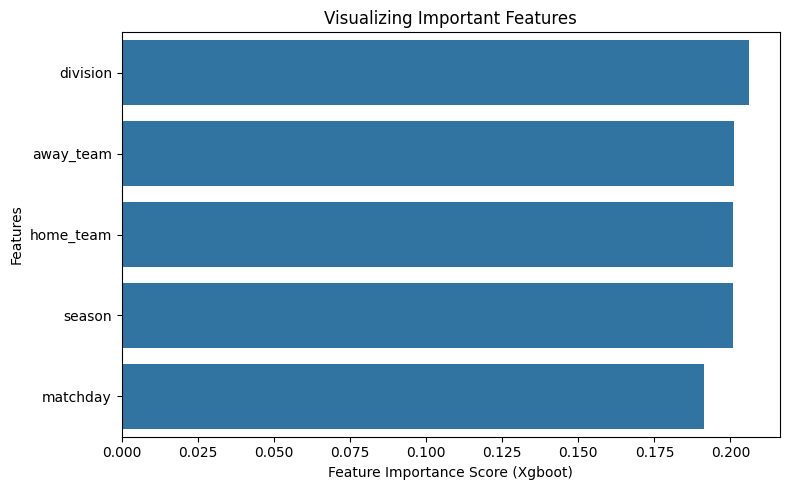

In [108]:
# --------------------------------------------------
# Feature importances (usar el modelo entrenado)
# --------------------------------------------------

# features importances
importances = best_model_xgb.feature_importances_

# name columns
feature_names = getattr(X_train, "columns", [f"f{i}" for i in range(len(importances))])
feature_scores = (
    pd.Series(importances, index=feature_names)
      .sort_values(ascending=False)
)

print('Feature Importances Random Forest:\n', feature_scores)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.xlabel('Feature Importance Score (Xgboot)')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()

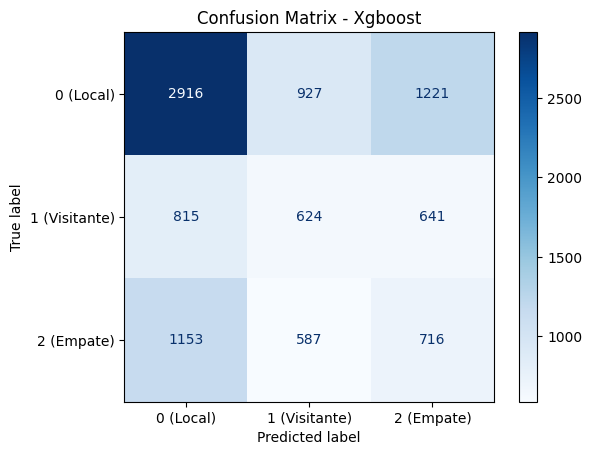

In [109]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=display_names)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Xgboost")
plt.show()

In [110]:
# --------------------------------
# Clasification report
# --------------------------------
print(f' Classification Report: {classification_report(y_test, y_pred_xgb)}')

 Classification Report:               precision    recall  f1-score   support

           0       0.60      0.58      0.59      5064
           1       0.29      0.30      0.30      2080
           2       0.28      0.29      0.28      2456

    accuracy                           0.44      9600
   macro avg       0.39      0.39      0.39      9600
weighted avg       0.45      0.44      0.45      9600



In [111]:
# # --------------------------------
# # Curva ROC
# # --------------------------------

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import roc_curve, auc, roc_auc_score

# # Clases en el orden del modelo
# classes = best_xgb.classes_          # p.ej. array([0,1,2])

# # Binarizar y_test a One-vs-Rest
# y_test_bin = label_binarize(y_test, classes=classes)

# # Probabilidades por clase (n_muestras, n_clases)
# y_pred_prob = best_xgb.predict_proba(X_test)

# fig, ax = plt.subplots(figsize=(10, 8))

# # ROC por clase
# roc_tuples = []
# for i, c in enumerate(classes):
#     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
#     auc_i = auc(fpr, tpr)
#     roc_tuples.append((fpr, tpr))
#     ax.plot(fpr, tpr, lw=2, label=f'Clase {c} (AUC = {auc_i:.3f})')

# # Micro-average
# fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
# auc_micro = auc(fpr_micro, tpr_micro)
# ax.plot(fpr_micro, tpr_micro, linestyle=':', lw=2, label=f'Micro (AUC = {auc_micro:.3f})')

# # Macro-average
# all_fpr = np.unique(np.concatenate([t[0] for t in roc_tuples]))
# mean_tpr = np.zeros_like(all_fpr)
# for fpr_i, tpr_i in roc_tuples:
#     mean_tpr += np.interp(all_fpr, fpr_i, tpr_i)
# mean_tpr /= len(classes)
# auc_macro = auc(all_fpr, mean_tpr)
# ax.plot(all_fpr, mean_tpr, linestyle='--', lw=2, label=f'Macro (AUC = {auc_macro:.3f})')

# ax.plot([0,1],[0,1],'--', lw=1, color='gray')
# ax.set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')
# ax.set_title('Curvas ROC multiclase (One-vs-Rest) — XGBoost')
# ax.legend(loc='lower right'); plt.tight_layout(); plt.show()

# # (Opcional) AUC global como número
# print(f"AUC macro OvR: {roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr', average='macro'):.3f}")
# print(f"AUC micro OvR: {roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr', average='micro'):.3f}")


In [112]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_pred_new_xgb = best_model_xgb.predict(X_to_predict)

#### Neural Network (NN):


========== Entrenando modelo con 10 epochs y batch size 16 ==========
Epoch 1/10


c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2360/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.3593 - loss: 1.0991
Epoch 1: val_accuracy improved from -inf to 0.43240, saving model to best_dense_model_multiclass.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3599 - loss: 1.0990 - val_accuracy: 0.4324 - val_loss: 1.0666 - learning_rate: 0.0010
Epoch 2/10
2389/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.4292 - loss: 1.0774
Epoch 2: val_accuracy improved from 0.43240 to 0.44615, saving model to best_dense_model_multiclass.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4292 - loss: 1.0774 - val_accuracy: 0.4461 - val_loss: 1.0529 - learning_rate: 0.0010
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.4263 - loss: 1.0769
Epoch 3: val_accuracy did not improve from 0.44615
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4263 - loss: 1.0769 - val_accuracy: 0.4100 - val_loss: 1.0874 - learning_rate: 0.0010
Epoch 4/10
2363/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/s

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1176/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.3890 - loss: 1.0901
Epoch 1: val_accuracy did not improve from 0.46729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3893 - loss: 1.0900 - val_accuracy: 0.4483 - val_loss: 1.0499 - learning_rate: 0.0010
Epoch 2/10
1170/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.4295 - loss: 1.0737
Epoch 2: val_accuracy did not improve from 0.46729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4295 - loss: 1.0737 - val_accuracy: 0.4089 - val_loss: 1.0959 - learning_rate: 0.0010
Epoch 3/10
1175/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.4374 - loss: 1.0756
Epoch 3: val_accuracy did not improve from 0.46729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4374 - loss: 1.0755 - val_accuracy: 0.4504 - val_loss: 1.0497 - learning_rate: 0.0010
Epoch 4/10
1151/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.4448 - loss: 1.0672
Epoch 4: val_accuracy did not improve from 0.46729
1200/1200 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


588/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3234 - loss: 1.1012
Epoch 1: val_accuracy did not improve from 0.46729
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3242 - loss: 1.1011 - val_accuracy: 0.4118 - val_loss: 1.0782 - learning_rate: 0.0010
Epoch 2/10
590/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4287 - loss: 1.0787
Epoch 2: val_accuracy did not improve from 0.46729
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4287 - loss: 1.0787 - val_accuracy: 0.3976 - val_loss: 1.0904 - learning_rate: 0.0010
Epoch 3/10
591/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4302 - loss: 1.0761
Epoch 3: val_accuracy improved from 0.46729 to 0.47240, saving model to best_dense_model_multiclass.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4304 - loss: 1.0760 - val_accuracy: 0.4724 - val_loss: 1.0347 - learning_rate: 0.0010
Epoch 4/10
564/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4424 - loss: 1.0741
Epoch 4: val_accuracy did not improv

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2359/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.3488 - loss: 1.0981
Epoch 1: val_accuracy did not improve from 0.47240
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3495 - loss: 1.0980 - val_accuracy: 0.4494 - val_loss: 1.0493 - learning_rate: 0.0010
Epoch 2/20
2392/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.4215 - loss: 1.0768
Epoch 2: val_accuracy did not improve from 0.47240
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4215 - loss: 1.0767 - val_accuracy: 0.4482 - val_loss: 1.0488 - learning_rate: 0.0010
Epoch 3/20
2396/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.4347 - loss: 1.0756
Epoch 3: val_accuracy did not improve from 0.47240
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4347 - loss: 1.0756 - val_accuracy: 0.4432 - val_loss: 1.0484 - learning_rate: 0.0010
Epoch 4/20
2399/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.4451 - loss: 1.0732
Epoch 4: val_accuracy did not improve from 0.47240
2400/2400 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1181/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.3799 - loss: 1.0921
Epoch 1: val_accuracy did not improve from 0.47729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3803 - loss: 1.0920 - val_accuracy: 0.4240 - val_loss: 1.0772 - learning_rate: 0.0010
Epoch 2/20
1161/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.4285 - loss: 1.0803
Epoch 2: val_accuracy did not improve from 0.47729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4287 - loss: 1.0802 - val_accuracy: 0.3656 - val_loss: 1.1083 - learning_rate: 0.0010
Epoch 3/20
1179/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.4321 - loss: 1.0739
Epoch 3: val_accuracy did not improve from 0.47729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4322 - loss: 1.0739 - val_accuracy: 0.4371 - val_loss: 1.0603 - learning_rate: 0.0010
Epoch 4/20
1191/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4433 - loss: 1.0654
Epoch 4: val_accuracy did not improve from 0.47729
1200/1200 ━━━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3412 - loss: 1.1020
Epoch 1: val_accuracy did not improve from 0.47729
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3413 - loss: 1.1020 - val_accuracy: 0.3625 - val_loss: 1.0976 - learning_rate: 0.0010
Epoch 2/20
592/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4190 - loss: 1.0828
Epoch 2: val_accuracy did not improve from 0.47729
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4190 - loss: 1.0828 - val_accuracy: 0.4181 - val_loss: 1.0595 - learning_rate: 0.0010
Epoch 3/20
555/600 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.4333 - loss: 1.0747
Epoch 3: val_accuracy did not improve from 0.47729
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4335 - loss: 1.0746 - val_accuracy: 0.4289 - val_loss: 1.0683 - learning_rate: 0.0010
Epoch 4/20
554/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4377 - loss: 1.0704
Epoch 4: val_accuracy did not improve from 0.47729
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2388/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.3666 - loss: 1.0954
Epoch 1: val_accuracy did not improve from 0.47729
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3668 - loss: 1.0954 - val_accuracy: 0.4607 - val_loss: 1.0512 - learning_rate: 0.0010
Epoch 2/30
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4293 - loss: 1.0756
Epoch 2: val_accuracy did not improve from 0.47729
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4293 - loss: 1.0756 - val_accuracy: 0.4373 - val_loss: 1.0574 - learning_rate: 0.0010
Epoch 3/30
2385/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.4396 - loss: 1.0700
Epoch 3: val_accuracy did not improve from 0.47729
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4396 - loss: 1.0700 - val_accuracy: 0.4241 - val_loss: 1.0765 - learning_rate: 0.0010
Epoch 4/30
2384/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.4430 - loss: 1.0722
Epoch 4: val_accuracy did not improve from 0.47729
2400/2400 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.3863 - loss: 1.0918
Epoch 1: val_accuracy did not improve from 0.47729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3863 - loss: 1.0918 - val_accuracy: 0.4155 - val_loss: 1.0760 - learning_rate: 0.0010
Epoch 2/30
1182/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.4289 - loss: 1.0762
Epoch 2: val_accuracy did not improve from 0.47729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4290 - loss: 1.0762 - val_accuracy: 0.4322 - val_loss: 1.0766 - learning_rate: 0.0010
Epoch 3/30
1190/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.4381 - loss: 1.0738
Epoch 3: val_accuracy did not improve from 0.47729
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4381 - loss: 1.0738 - val_accuracy: 0.4303 - val_loss: 1.0594 - learning_rate: 0.0010
Epoch 4/30
1146/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.4432 - loss: 1.0693
Epoch 4: val_accuracy did not improve from 0.47729
1200/1200 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3324 - loss: 1.1002
Epoch 1: val_accuracy did not improve from 0.47729
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3349 - loss: 1.0998 - val_accuracy: 0.3889 - val_loss: 1.0886 - learning_rate: 0.0010
Epoch 2/30
592/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4264 - loss: 1.0776
Epoch 2: val_accuracy did not improve from 0.47729
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4265 - loss: 1.0777 - val_accuracy: 0.4080 - val_loss: 1.0719 - learning_rate: 0.0010
Epoch 3/30
588/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4406 - loss: 1.0722
Epoch 3: val_accuracy did not improve from 0.47729
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4405 - loss: 1.0722 - val_accuracy: 0.4285 - val_loss: 1.0702 - learning_rate: 0.0010
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4417 - loss: 1.0717
Epoch 4: val_accuracy did not improve from 0.47729
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2360/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.3508 - loss: 1.0983
Epoch 1: val_accuracy did not improve from 0.47729
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3515 - loss: 1.0981 - val_accuracy: 0.3826 - val_loss: 1.0998 - learning_rate: 0.0010
Epoch 2/40
2390/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.4358 - loss: 1.0740
Epoch 2: val_accuracy improved from 0.47729 to 0.49792, saving model to best_dense_model_multiclass.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4358 - loss: 1.0740 - val_accuracy: 0.4979 - val_loss: 1.0312 - learning_rate: 0.0010
Epoch 3/40
2364/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.4381 - loss: 1.0684
Epoch 3: val_accuracy did not improve from 0.49792
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4381 - loss: 1.0684 - val_accuracy: 0.4118 - val_loss: 1.0848 - learning_rate: 0.0010
Epoch 4/40
2369/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.4428 - loss: 1.0716
Epoch 4: val_a

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1188/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.3536 - loss: 1.0971
Epoch 1: val_accuracy did not improve from 0.49792
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3540 - loss: 1.0970 - val_accuracy: 0.4415 - val_loss: 1.0609 - learning_rate: 0.0010
Epoch 2/40
1185/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.4282 - loss: 1.0751
Epoch 2: val_accuracy did not improve from 0.49792
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4282 - loss: 1.0752 - val_accuracy: 0.4658 - val_loss: 1.0481 - learning_rate: 0.0010
Epoch 3/40
1186/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.4403 - loss: 1.0737
Epoch 3: val_accuracy did not improve from 0.49792
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4404 - loss: 1.0736 - val_accuracy: 0.4519 - val_loss: 1.0570 - learning_rate: 0.0010
Epoch 4/40
1182/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.4437 - loss: 1.0703
Epoch 4: val_accuracy did not improve from 0.49792
1200/1200 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


573/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3679 - loss: 1.0946
Epoch 1: val_accuracy did not improve from 0.49792
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3688 - loss: 1.0945 - val_accuracy: 0.4277 - val_loss: 1.0712 - learning_rate: 0.0010
Epoch 2/40
592/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4128 - loss: 1.0854
Epoch 2: val_accuracy did not improve from 0.49792
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4130 - loss: 1.0853 - val_accuracy: 0.3945 - val_loss: 1.0857 - learning_rate: 0.0010
Epoch 3/40
593/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4285 - loss: 1.0783
Epoch 3: val_accuracy did not improve from 0.49792
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4285 - loss: 1.0783 - val_accuracy: 0.4701 - val_loss: 1.0412 - learning_rate: 0.0010
Epoch 4/40
575/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4405 - loss: 1.0719
Epoch 4: val_accuracy did not improve from 0.49792
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2355/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3792 - loss: 1.0945
Epoch 1: val_accuracy did not improve from 0.49792
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3797 - loss: 1.0944 - val_accuracy: 0.3817 - val_loss: 1.0835 - learning_rate: 0.0010
Epoch 2/50
2364/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4282 - loss: 1.0755
Epoch 2: val_accuracy did not improve from 0.49792
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4282 - loss: 1.0755 - val_accuracy: 0.3817 - val_loss: 1.1012 - learning_rate: 0.0010
Epoch 3/50
2356/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4327 - loss: 1.0731
Epoch 3: val_accuracy did not improve from 0.49792
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4327 - loss: 1.0731 - val_accuracy: 0.3989 - val_loss: 1.0920 - learning_rate: 0.0010
Epoch 4/50
2367/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4368 - loss: 1.0716
Epoch 4: val_accuracy did not improve from 0.49792
2400/2400 ━━━━━━━━━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1168/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.3620 - loss: 1.0935
Epoch 1: val_accuracy did not improve from 0.49792
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3629 - loss: 1.0934 - val_accuracy: 0.4297 - val_loss: 1.0579 - learning_rate: 0.0010
Epoch 2/50
1180/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.4226 - loss: 1.0783
Epoch 2: val_accuracy did not improve from 0.49792
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4227 - loss: 1.0783 - val_accuracy: 0.3920 - val_loss: 1.0942 - learning_rate: 0.0010
Epoch 3/50
1184/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.4317 - loss: 1.0764
Epoch 3: val_accuracy did not improve from 0.49792
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4318 - loss: 1.0763 - val_accuracy: 0.4933 - val_loss: 1.0150 - learning_rate: 0.0010
Epoch 4/50
1178/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.4383 - loss: 1.0716
Epoch 4: val_accuracy did not improve from 0.49792
1200/1200 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


583/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3653 - loss: 1.0959
Epoch 1: val_accuracy did not improve from 0.49792
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3662 - loss: 1.0958 - val_accuracy: 0.4535 - val_loss: 1.0580 - learning_rate: 0.0010
Epoch 2/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4354 - loss: 1.0818
Epoch 2: val_accuracy did not improve from 0.49792
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4353 - loss: 1.0818 - val_accuracy: 0.4624 - val_loss: 1.0424 - learning_rate: 0.0010
Epoch 3/50
546/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4360 - loss: 1.0690
Epoch 3: val_accuracy did not improve from 0.49792
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4358 - loss: 1.0694 - val_accuracy: 0.4396 - val_loss: 1.0591 - learning_rate: 0.0010
Epoch 4/50
576/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4382 - loss: 1.0703
Epoch 4: val_accuracy did not improve from 0.49792
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

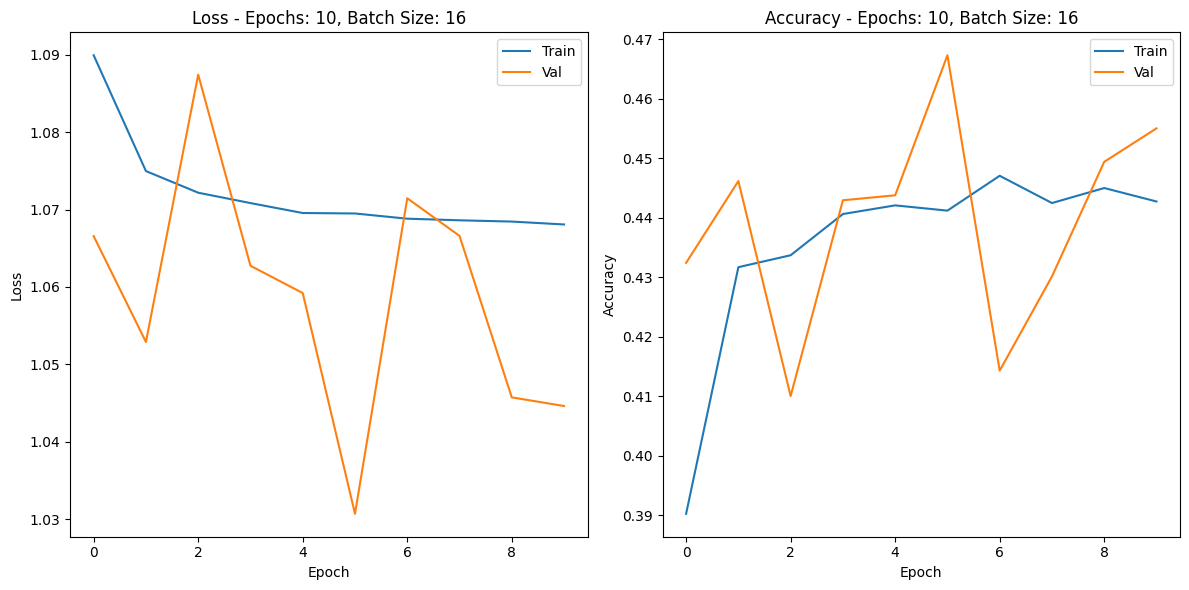


Epochs: 10, Batch Size: 32, Test Loss: 1.0473, Test Accuracy: 0.4401


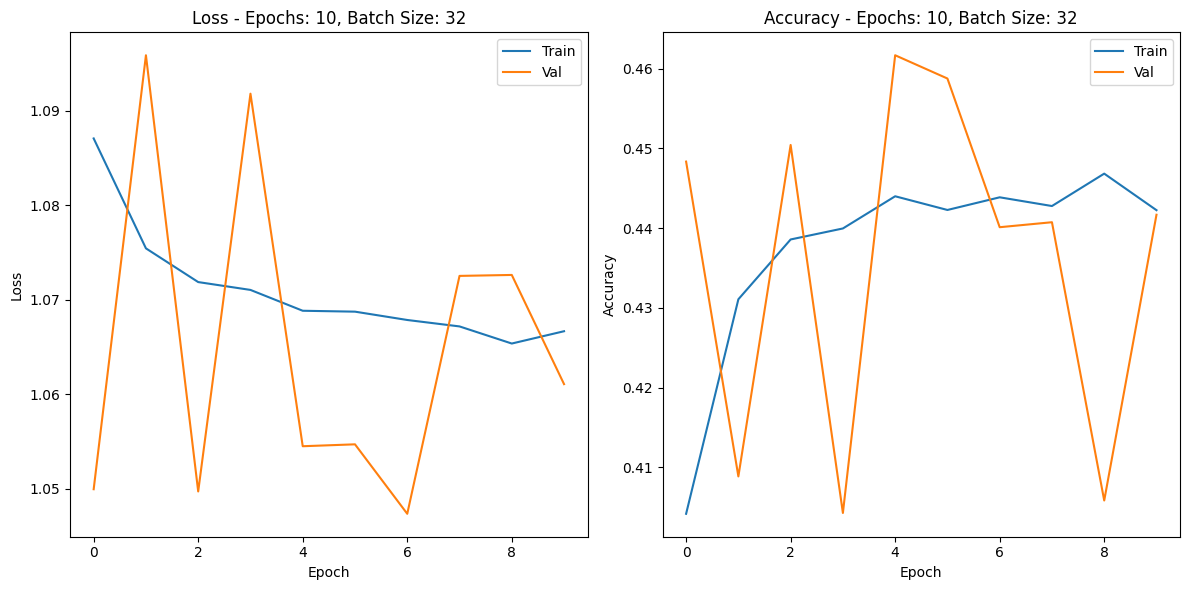


Epochs: 10, Batch Size: 64, Test Loss: 1.0347, Test Accuracy: 0.4724


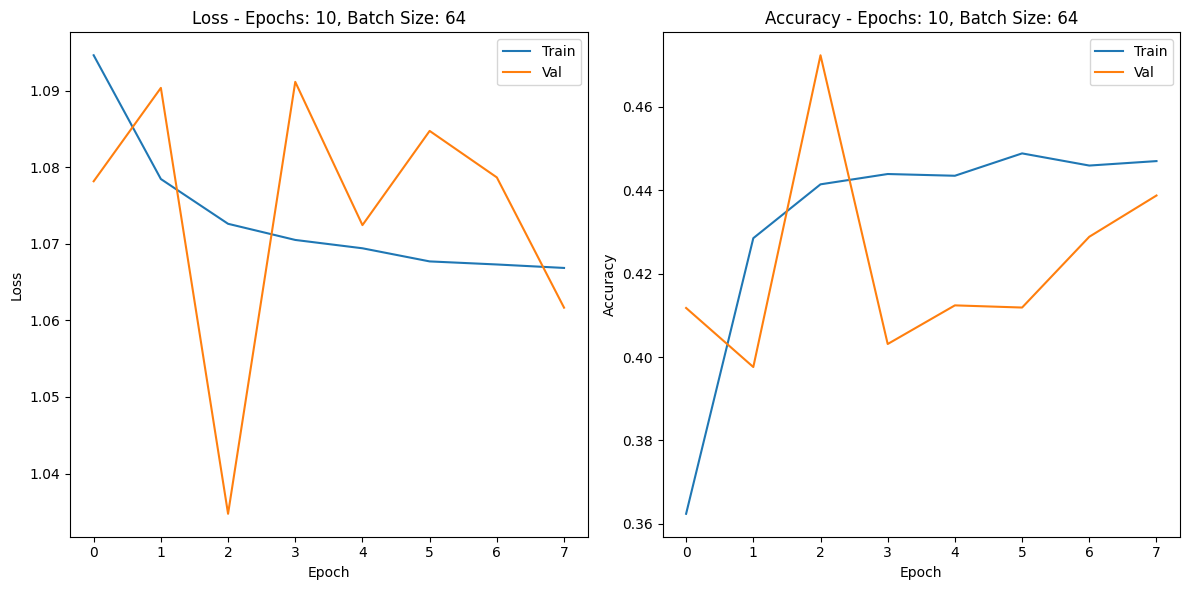


Epochs: 20, Batch Size: 16, Test Loss: 1.0313, Test Accuracy: 0.4628


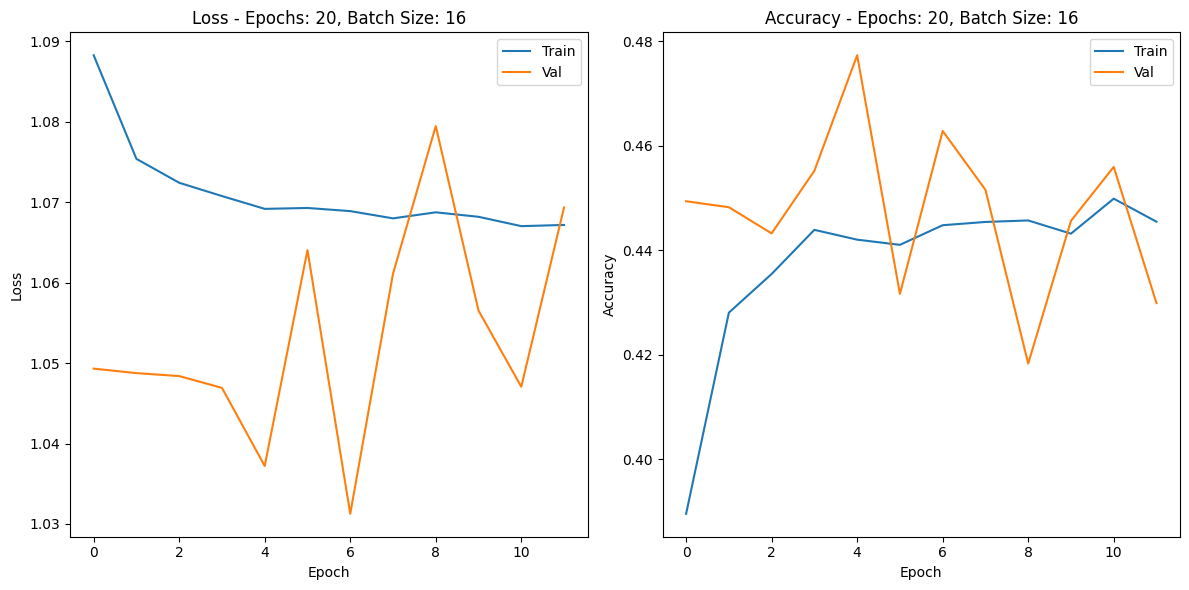


Epochs: 20, Batch Size: 32, Test Loss: 1.0465, Test Accuracy: 0.4490


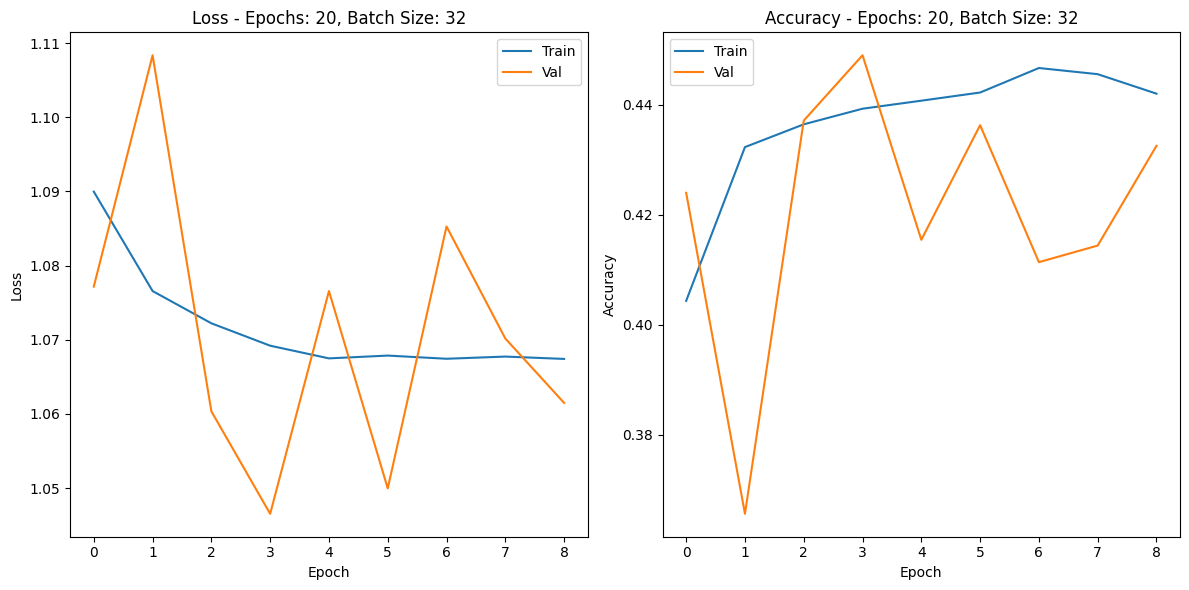


Epochs: 20, Batch Size: 64, Test Loss: 1.0595, Test Accuracy: 0.4181


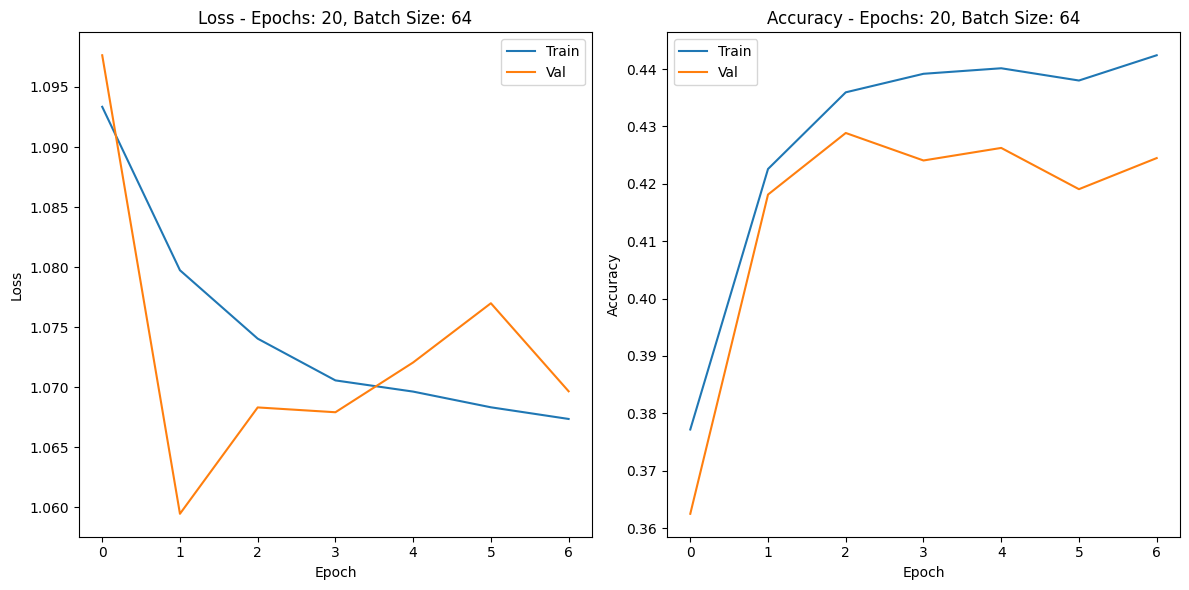


Epochs: 30, Batch Size: 16, Test Loss: 1.0294, Test Accuracy: 0.4667


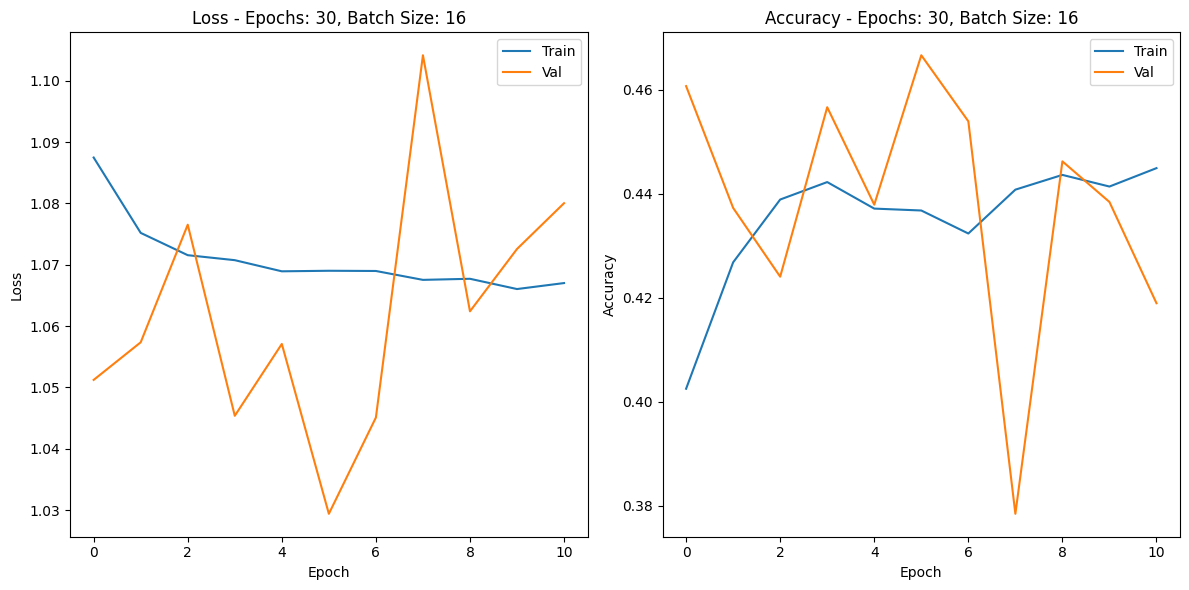


Epochs: 30, Batch Size: 32, Test Loss: 1.0290, Test Accuracy: 0.4722


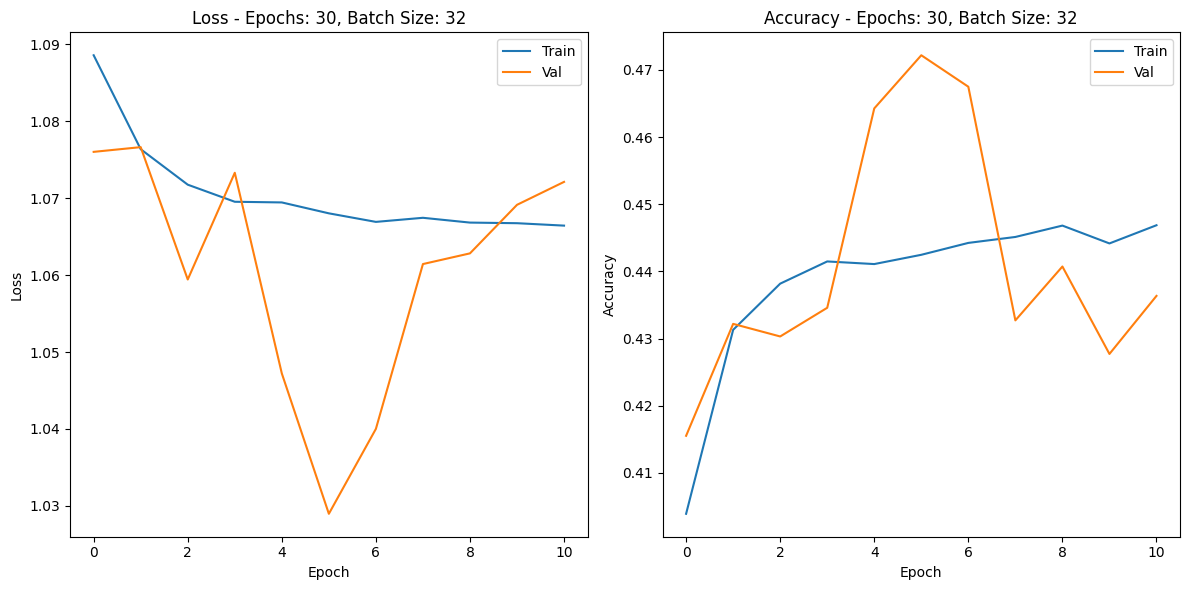


Epochs: 30, Batch Size: 64, Test Loss: 1.0501, Test Accuracy: 0.4449


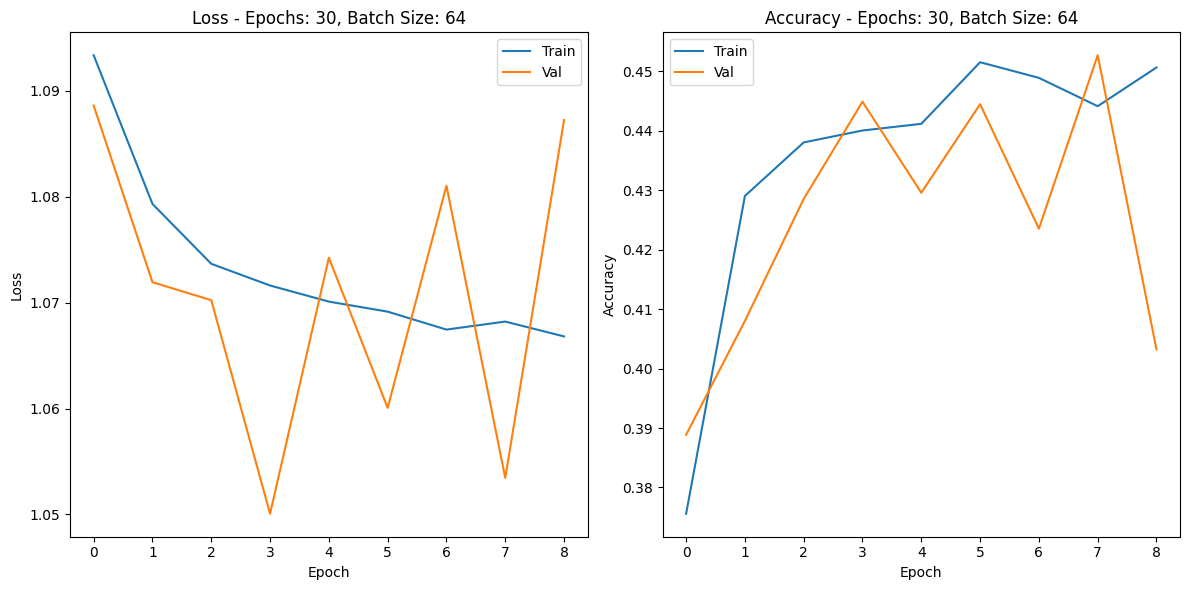


Epochs: 40, Batch Size: 16, Test Loss: 1.0312, Test Accuracy: 0.4979


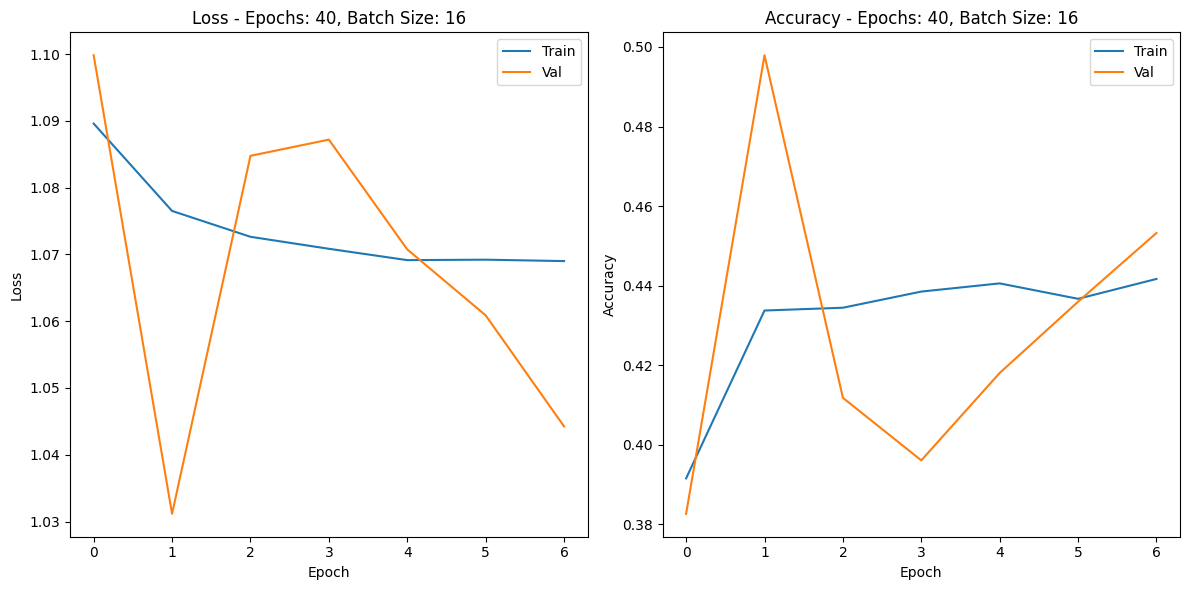


Epochs: 40, Batch Size: 32, Test Loss: 1.0409, Test Accuracy: 0.4599


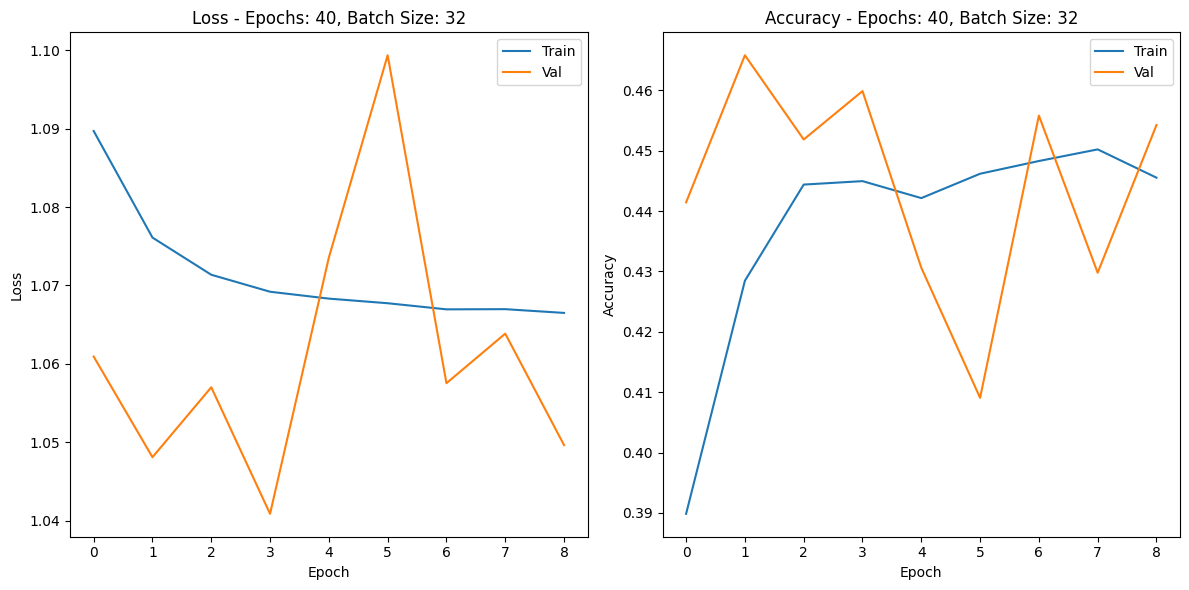


Epochs: 40, Batch Size: 64, Test Loss: 1.0412, Test Accuracy: 0.4701


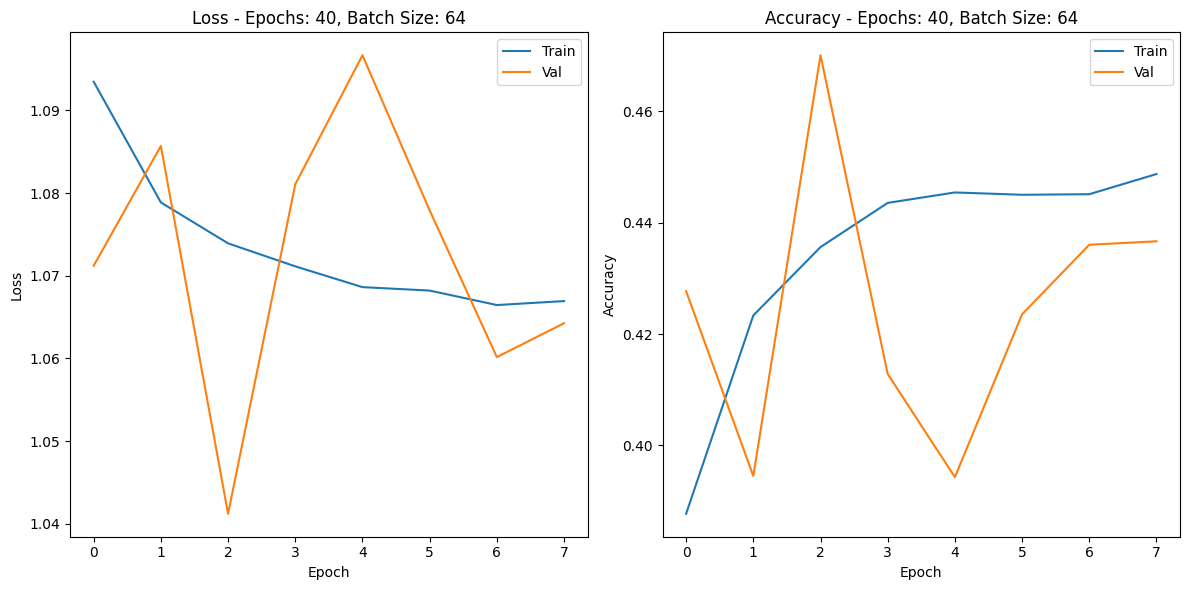


Epochs: 50, Batch Size: 16, Test Loss: 1.0273, Test Accuracy: 0.4837


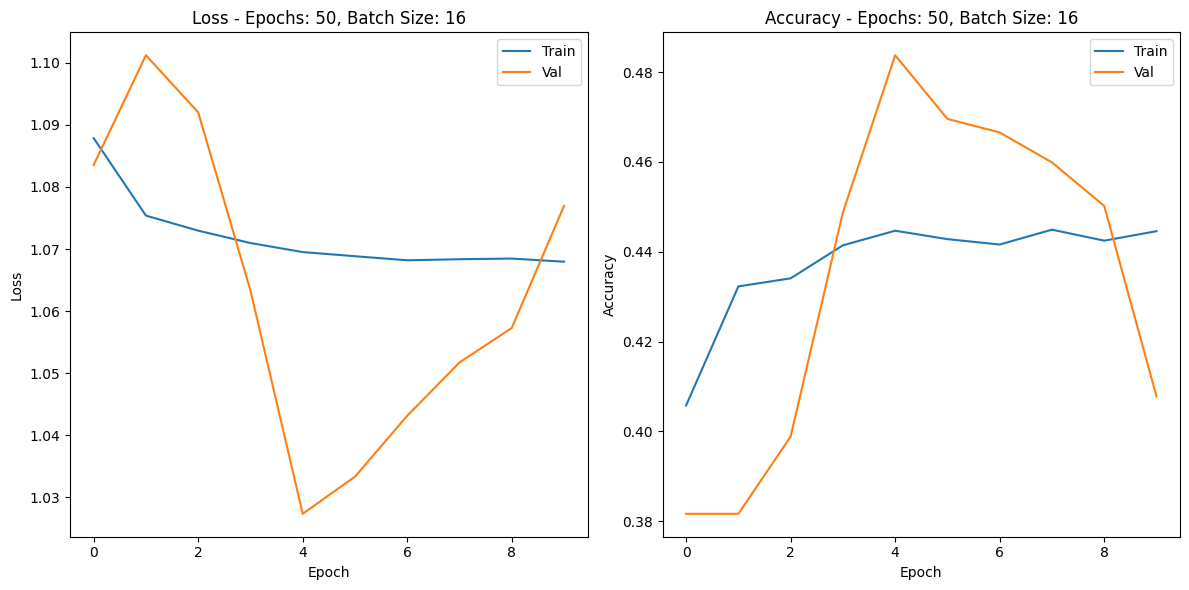


Epochs: 50, Batch Size: 32, Test Loss: 1.0150, Test Accuracy: 0.4933


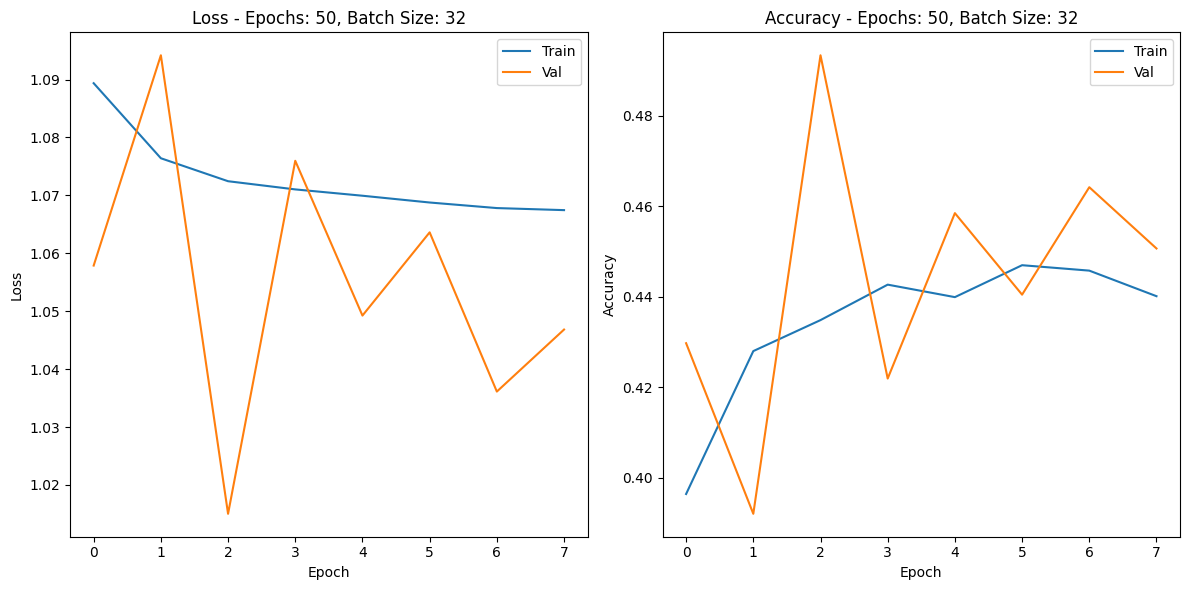


Epochs: 50, Batch Size: 64, Test Loss: 1.0424, Test Accuracy: 0.4624


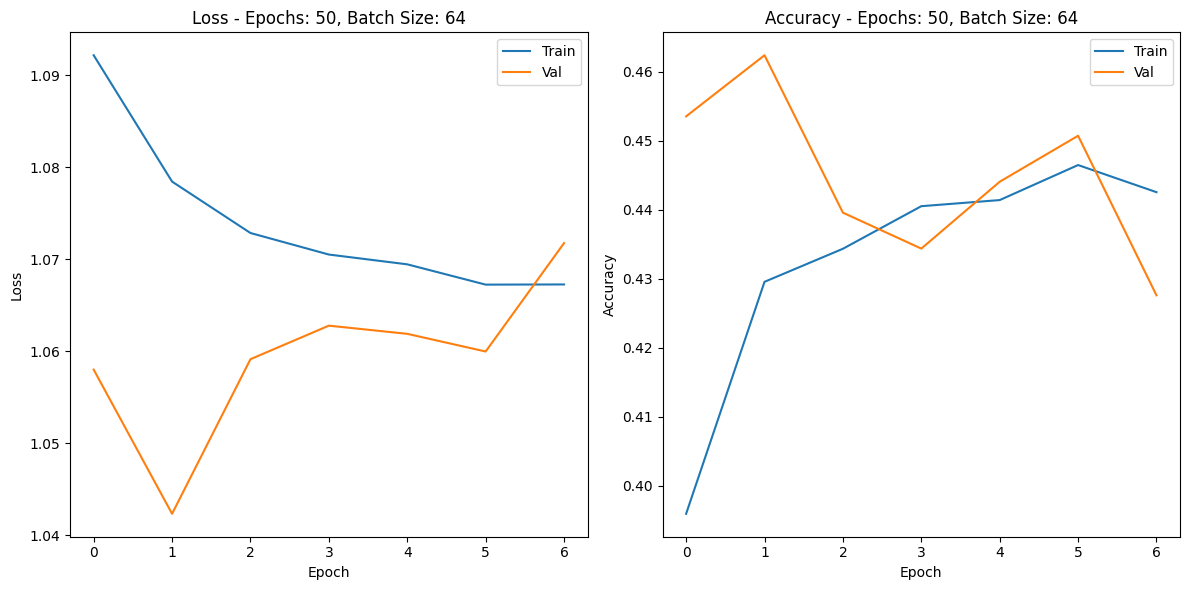


========== Mejor Modelo ==========
Accuracy: 0.4979 con Epochs: 40 y Batch Size: 16
Test Loss: 1.0312


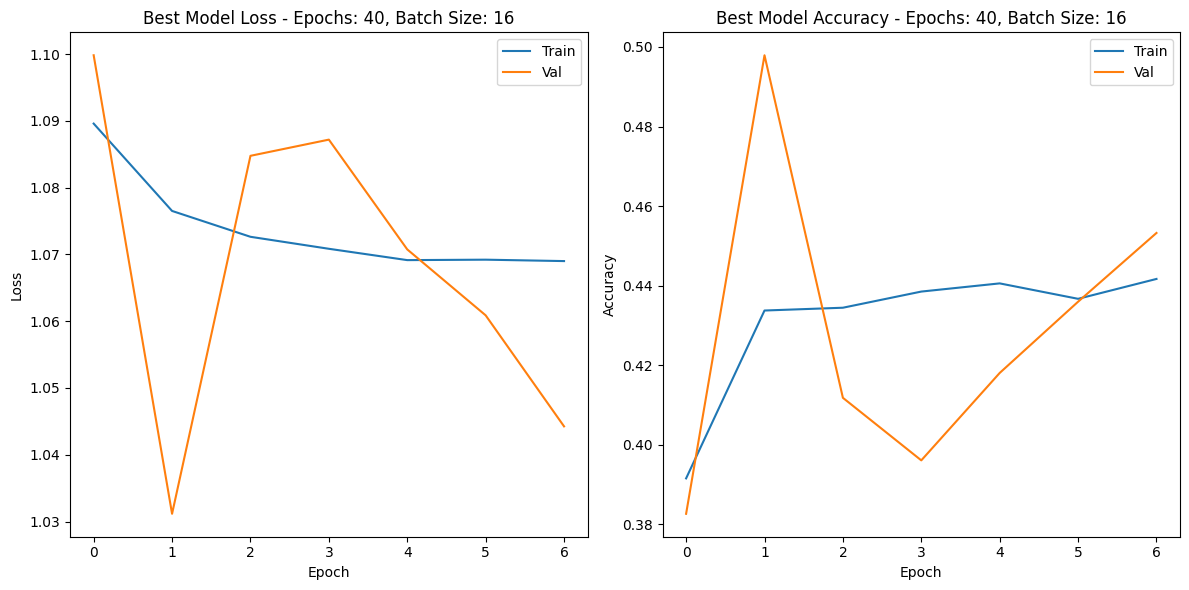

In [113]:
###################
# Implement a ANN #
###################

# Paso 2: Definir el modelo con capas densas para clasificación multiclase
def model(input_shape, num_classes=3):
    model = models.Sequential()

    # Capa densa 1
    model.add(layers.Dense(128, activation='relu', input_shape=input_shape))
    model.add(layers.Dropout(0.3))

    # Capa densa 2
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Capa densa 3
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Capa de salida para clasificación multiclase (softmax)
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compilación
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Para clasificación multiclase
                  metrics=['accuracy'])
    
    return model

# Paso 3: Definir callbacks
# Early Stopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

# To save the best model
model_checkpoint_callback = ModelCheckpoint(
    'best_dense_model_multiclass.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Learning Rate
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)

# Paso 4: Probar combinaciones de epochs y batch_size
epochs_values = [10, 20, 30, 40, 50]
batch_sizes = [16, 32, 64]

# Diccionario para almacenar los resultados
results = {}

# Balanceo de clases
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

for epochs in epochs_values:
    for batch_size in batch_sizes:
        print(f"\n========== Entrenando modelo con {epochs} epochs y batch size {batch_size} ==========")
        
        # Crear el modelo
        dense_model = model(input_shape=(X_train.shape[1],))  # Ajustar input_shape según tus datos
        
        history = dense_model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test),
            callbacks=[early_stopping_callback, model_checkpoint_callback, reduce_lr_callback],
            verbose=1,
            class_weight=class_weights_dict  
        )
        
        score = dense_model.evaluate(X_test, y_test, verbose=0)
        
        results[(epochs, batch_size)] = {
            "test_loss": score[0],
            "test_accuracy": score[1],
            "history": history,
            "model": dense_model
        }

# Paso 5: Mostrar los resultados para todas las combinaciones de epochs y batch_size
best_acc = 0
best_params = None
best_result = None
best_model = None

for (epochs, batch_size), result in results.items():
    print(f"\nEpochs: {epochs}, Batch Size: {batch_size}, Test Loss: {result['test_loss']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")
    
    plt.figure(figsize=(12, 6))

    # Gráfico de loss
    plt.subplot(1, 2, 1)
    plt.plot(result['history'].history['loss'])
    plt.plot(result['history'].history['val_loss'])
    plt.title(f'Loss - Epochs: {epochs}, Batch Size: {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'])

    # Gráfico de accuracy
    plt.subplot(1, 2, 2)
    plt.plot(result['history'].history['accuracy'])
    plt.plot(result['history'].history['val_accuracy'])
    plt.title(f'Accuracy - Epochs: {epochs}, Batch Size: {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'])

    plt.tight_layout()
    plt.show()

    if result['test_accuracy'] > best_acc:
        best_acc = result['test_accuracy']
        best_params = (epochs, batch_size)
        best_result = result
        best_model = result['model']

# Paso 6: Mostrar resultados del mejor modelo
print("\n========== Mejor Modelo ==========")
print(f"Accuracy: {best_acc:.4f} con Epochs: {best_params[0]} y Batch Size: {best_params[1]}")
print(f"Test Loss: {best_result['test_loss']:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(best_result['history'].history['loss'])
plt.plot(best_result['history'].history['val_loss'])
plt.title(f'Best Model Loss - Epochs: {best_params[0]}, Batch Size: {best_params[1]}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(best_result['history'].history['accuracy'])
plt.plot(best_result['history'].history['val_accuracy'])
plt.title(f'Best Model Accuracy - Epochs: {best_params[0]}, Batch Size: {best_params[1]}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])

plt.tight_layout()
plt.show()

In [114]:
# --------------------------------
# Summary the best model
# --------------------------------
best_model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,611 (131.30 KB)

 Trainable params: 11,203 (43.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,408 (87.54 KB)

In [115]:
# --------------------------------
# Visualization
# --------------------------------
plot_model(best_model, show_shapes=True, dpi=125)

In [116]:
# --------------------------------
# Predict (test set)
# --------------------------------

# Paso 1: Predecir probabilidades con el mejor modelo
y_probs = best_model.predict(X_test)

# Paso 2: Convertir probabilidades a clases (máximo valor en cada fila)
y_pred_nn = np.argmax(y_probs, axis=1)

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step


In [117]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=display_names)
disp_nn.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - NN")
plt.show()

In [118]:
# --------------------------------
# Clasification report
# --------------------------------
print(f' Classification Report: {classification_report(y_test, y_pred_nn)}')

 Classification Report:               precision    recall  f1-score   support

           0       0.58      0.75      0.66      5064
           1       0.33      0.22      0.27      2080
           2       0.31      0.20      0.25      2456

    accuracy                           0.50      9600
   macro avg       0.41      0.39      0.39      9600
weighted avg       0.46      0.50      0.47      9600



In [119]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_prob_new_nn = best_model.predict(X_to_predict)
y_pred_nn = np.argmax(y_prob_new_nn, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


### Dataset La Liga - Creación de nuevas variables

In [120]:
################################
# Creación de nuevas variables #
################################

# -------------------------------------------------
# 0) Crear df_rank desde df
# -------------------------------------------------
df_rank = df.copy()

# -------------------------------------------------
# 0) Copia de trabajo y 'result' según tu codificación
# -------------------------------------------------
df_rank = df.copy()

if 'result' not in df_rank.columns:
    # 0=local, 1=visitante, 2=empate
    df_rank['result'] = df_rank.apply(
        lambda r: 0 if r['home_goals'] > r['away_goals']
        else (1 if r['home_goals'] < r['away_goals'] else 2),
        axis=1
    )

# -------------------------------------------------
# 0.1) 'season_start' para ordenar y ventanear H2H
#      Soporta 'YYYY-YYYY', 'YYYY-YY', 'YYYY/YY', 'YYYY'
# -------------------------------------------------
def season_to_int(season):
    s = str(season)
    try:
        return int(re.split(r'[-/]', s)[0])  # toma el año inicial
    except Exception:
        try:
            return int(s)
        except Exception:
            return np.nan

df_rank['season_start'] = df_rank['season'].apply(season_to_int).astype('Int64')

# Orden temporal base
df_rank = df_rank.sort_values(['season_start', 'division', 'matchday']).reset_index(drop=True)

# -------------------------------------------------
# 1) RANKINGS ACUMULADOS Y PREVIOS (sin data leakage)
# # -------------------------------------------------

# 1.1 Vista local → esquema homogéneo (team, GF, GA, W/L/T)
home = df_rank[['season_start','season','division','matchday','home_team','home_goals','away_goals']].copy()
home = home.rename(columns={'home_team':'team','home_goals':'GF','away_goals':'GA'})
home['result_WLT'] = np.where(home['GF'] > home['GA'], 'W', np.where(home['GF'] < home['GA'], 'L', 'T'))

# 1.2 Vista visitante → esquema homogéneo (team, GF, GA, W/L/T)
away = df_rank[['season_start','season','division','matchday','away_team','away_goals','home_goals']].copy()
away = away.rename(columns={'away_team':'team','away_goals':'GF','home_goals':'GA'})
away['result_WLT'] = np.where(away['GF'] > away['GA'], 'W', np.where(away['GF'] < away['GA'], 'L', 'T'))

# 1.3 Unificación y orden
matches = pd.concat([home, away], ignore_index=True)
matches = matches.sort_values(['season_start','season','division','matchday']).reset_index(drop=True)

# 1.4 One-hot y acumulados por equipo (por season/division)
matches['W'] = (matches['result_WLT'] == 'W').astype(int)
matches['L'] = (matches['result_WLT'] == 'L').astype(int)
matches['T'] = (matches['result_WLT'] == 'T').astype(int)

agg_cols = ['GF','GA','W','L','T']
matches[agg_cols] = matches.groupby(['season_start','division','team'])[agg_cols].cumsum()

# 1.5 Métricas de tabla
matches['GD']  = matches['GF'] - matches['GA']
matches['Pts'] = matches['W']*3 + matches['T']

# 1.6 Ranking por jornada (desempate: Pts > GD > GF)
matches['rank_key'] = matches['Pts']*1000 + matches['GD']*10 + matches['GF']
matches['ranking'] = matches.groupby(['season_start','division','matchday'])['rank_key'] \
    .rank(method='dense', ascending=False).astype('Int64')
matches = matches.drop(columns='rank_key')

# 1.7 Valores PREVIOS (fecha anterior por equipo) → sin fuga
matches = matches.sort_values(['season_start','division','team','matchday'])
matches['prev_ranking'] = matches.groupby(['season_start','division','team'])['ranking'].shift(1)
matches['prev_pts']     = matches.groupby(['season_start','division','team'])['Pts'].shift(1)
matches['prev_gd']      = matches.groupby(['season_start','division','team'])['GD'].shift(1)

# Primer partido: pts/gd previos = 0; ranking previo lo rellenaremos luego con n_teams
matches['prev_pts'] = matches['prev_pts'].fillna(0)
matches['prev_gd']  = matches['prev_gd'].fillna(0)

# 1.8 Volver a local/visitante y fusionar en df_rank
home_rank = matches.rename(columns={
    'team':'home_team','prev_ranking':'home_ranking','prev_pts':'home_pts','prev_gd':'home_gd'
})[['season','division','matchday','home_team','home_ranking','home_pts','home_gd']]

away_rank = matches.rename(columns={
    'team':'away_team','prev_ranking':'away_ranking','prev_pts':'away_pts','prev_gd':'away_gd'
})[['season','division','matchday','away_team','away_ranking','away_pts','away_gd']]

home_rank = home_rank.drop_duplicates(subset=['season','division','matchday','home_team'])
away_rank = away_rank.drop_duplicates(subset=['season','division','matchday','away_team'])

df_rank = df_rank.merge(home_rank, on=['season','division','matchday','home_team'], how='left')
df_rank = df_rank.merge(away_rank, on=['season','division','matchday','away_team'], how='left')

# -------------------------------------------------
# 2) FORMA RECIENTE POR GOLES (últimos 5, excluye actual)
# -------------------------------------------------
df_rank['goal_diff_home'] = df_rank['home_goals'] - df_rank['away_goals']
df_rank['goal_diff_away'] = df_rank['away_goals'] - df_rank['home_goals']

home_stats = df_rank[['season_start','season','division','matchday','home_team','goal_diff_home']].copy()
home_stats = home_stats.rename(columns={'home_team':'team','goal_diff_home':'goal_diff'})

away_stats = df_rank[['season_start','season','division','matchday','away_team','goal_diff_away']].copy()
away_stats = away_stats.rename(columns={'away_team':'team','goal_diff_away':'goal_diff'})

team_stats = pd.concat([home_stats, away_stats], ignore_index=True)
team_stats = team_stats.sort_values(['season_start','division','team','matchday'])

# shift(1) para excluir el partido actual; rolling(5) = últimos 5
team_stats['last5_goal_diff'] = (
    team_stats.groupby(['season_start','division','team'])['goal_diff']
    .transform(lambda x: x.shift(1).rolling(5, min_periods=1).mean())
)

home_last5 = team_stats[['season','division','matchday','team','last5_goal_diff']].copy()
home_last5 = home_last5.rename(columns={'team':'home_team','last5_goal_diff':'HGD_last5'})

away_last5 = team_stats[['season','division','matchday','team','last5_goal_diff']].copy()
away_last5 = away_last5.rename(columns={'team':'away_team','last5_goal_diff':'AGD_last5'})

home_last5 = home_last5.drop_duplicates(subset=['season','division','matchday','home_team'])
away_last5 = away_last5.drop_duplicates(subset=['season','division','matchday','away_team'])

df_rank = df_rank.merge(home_last5, on=['season','division','matchday','home_team'], how='left')
df_rank = df_rank.merge(away_last5, on=['season','division','matchday','away_team'], how='left')

# Limpieza de auxiliares
df_rank = df_rank.drop(columns=['goal_diff_home','goal_diff_away'])

# -------------------------------------------------
# 3) FORMA RECIENTE POR PUNTOS (últimos 5, excluye actual)
# -------------------------------------------------
# Mapeos robustos (aceptan str o int)
HOME_POINTS_MAP = {0:3, 1:0, 2:1, '0':3, '1':0, '2':1}
AWAY_POINTS_MAP = {0:0, 1:3, 2:1, '0':0, '1':3, '2':1}

df_rank['points_home'] = df_rank['result'].map(HOME_POINTS_MAP)
df_rank['points_away'] = df_rank['result'].map(AWAY_POINTS_MAP)

home_stats = df_rank[['season_start','season','division','matchday','home_team','points_home']].copy()
home_stats = home_stats.rename(columns={'home_team':'team','points_home':'points'})

away_stats = df_rank[['season_start','season','division','matchday','away_team','points_away']].copy()
away_stats = away_stats.rename(columns={'away_team':'team','points_away':'points'})

team_stats = pd.concat([home_stats, away_stats], ignore_index=True)
team_stats = team_stats.sort_values(['season_start','division','team','matchday'])

team_stats['last5_points_avg'] = (
    team_stats.groupby(['season_start','division','team'])['points']
    .transform(lambda x: x.shift(1).rolling(5, min_periods=1).mean())
)

home_last5 = team_stats[['season','division','matchday','team','last5_points_avg']].copy()
home_last5 = home_last5.rename(columns={'team':'home_team','last5_points_avg':'Hpts_last5'})

away_last5 = team_stats[['season','division','matchday','team','last5_points_avg']].copy()
away_last5 = away_last5.rename(columns={'team':'away_team','last5_points_avg':'Apts_last5'})

home_last5 = home_last5.drop_duplicates(subset=['season','division','matchday','home_team'])
away_last5 = away_last5.drop_duplicates(subset=['season','division','matchday','away_team'])

df_rank = df_rank.merge(home_last5, on=['season','division','matchday','home_team'], how='left')
df_rank = df_rank.merge(away_last5, on=['season','division','matchday','away_team'], how='left')

# Limpieza de auxiliares
df_rank = df_rank.drop(columns=['points_home','points_away'])

# -------------------------------------------------
# 4) H2H: ratios históricos en ventana de 5 temporadas
#     - hist_home_win_ratio, hist_away_win_ratio
#     - sin fuga (solo partidos previos al actual)
# -------------------------------------------------
df_rank = df_rank.sort_values(["season_start","matchday"]).reset_index(drop=True)

# ID de emparejamiento independiente del orden local/visita
df_rank["pair"] = df_rank.apply(
    lambda r: "_".join(sorted([str(r["home_team"]), str(r["away_team"])])),
    axis=1
)

# 0=home win (+1) | 1=away win (-1) | 2=tie (0)
RESULT_NUM_MAP = {0: 1, 1: -1, 2: 0, '0': 1, '1': -1, '2': 0}
df_rank["result_num"] = df_rank["result"].map(RESULT_NUM_MAP)

df_rank["hist_home_win_ratio"] = np.nan
df_rank["hist_away_win_ratio"] = np.nan

for pair, group in df_rank.groupby("pair", sort=False):
    group = group.sort_values(["season_start","matchday"]).copy()
    hist_home, hist_away = [], []
    prev_matches = []

    for _, row in group.iterrows():
        current_season = int(row["season_start"])

        # Ventana de 5 temporadas (<= actual-5 … < actual)
        recent = [m for m in prev_matches if int(m["season_start"]) >= current_season - 5]

        if len(recent) > 0:
            # victorias históricas del equipo local actual
            wins_home = sum(
                (m["home_team"] == row["home_team"] and m["result_num"] == 1) or
                (m["away_team"] == row["home_team"] and m["result_num"] == -1)
                for m in recent
            )
            # victorias históricas del equipo visitante actual
            wins_away = sum(
                (m["home_team"] == row["away_team"] and m["result_num"] == 1) or
                (m["away_team"] == row["away_team"] and m["result_num"] == -1)
                for m in recent
            )
            total = len(recent)
            hist_home.append(wins_home / total if total > 0 else np.nan)
            hist_away.append(wins_away / total if total > 0 else np.nan)
        else:
            hist_home.append(np.nan)
            hist_away.append(np.nan)

        prev_matches.append(row)

    df_rank.loc[group.index, "hist_home_win_ratio"] = hist_home
    df_rank.loc[group.index, "hist_away_win_ratio"] = hist_away

# Limpieza auxiliares H2H
df_rank.drop(columns=["pair","result_num"], inplace=True)

# -------------------------------------------------
# 5) RELLENOS para evitar NaN en features
# -------------------------------------------------

# 5.1 H2H sin historial → neutralidad (0.5)
df_rank['hist_home_win_ratio'] = df_rank['hist_home_win_ratio'].fillna(0.5)
df_rank['hist_away_win_ratio'] = df_rank['hist_away_win_ratio'].fillna(0.5)

# 5.2 Forma (últimos 5) al inicio → 0.0
for col in ['HGD_last5', 'AGD_last5', 'Hpts_last5', 'Apts_last5']:
    df_rank[col] = df_rank[col].fillna(0.0)

# 5.3 Ranking previo al inicio → nº de equipos de la liga (peor posición posible)
teams_per_sd = (
    matches.groupby(['season','division'])['team']
    .nunique()
    .rename('n_teams')
    .reset_index()
)
df_rank = df_rank.merge(teams_per_sd, on=['season','division'], how='left')
df_rank['home_ranking'] = df_rank['home_ranking'].fillna(df_rank['n_teams'])
df_rank['away_ranking'] = df_rank['away_ranking'].fillna(df_rank['n_teams'])
df_rank = df_rank.drop(columns=['n_teams'])

# -------------------------------------------------
# 6) Orden final y salida para tu pipeline
# -------------------------------------------------
df_rank = df_rank.sort_values(['season_start','division','matchday']).reset_index(drop=True)

# -------------------------------------------------
# 7) Visualización Final
# -------------------------------------------------
df_rank.head(10)

season  division  matchday       date        home_team        away_team  \
0  1928-1929         1         1 1929-02-10      Arenas Club  Athletic Madrid   
1  1928-1929         1         1 1929-02-10         Espanyol       Real Unión   
2  1928-1929         1         1 1929-02-10      Real Madrid        Catalunya   
3  1928-1929         1         1 1929-02-10         Donostia         Athletic   
4  1928-1929         1         1 1929-02-12           Racing        Barcelona   
5  1928-1929         1         2 1929-02-17        Barcelona      Real Madrid   
6  1928-1929         1         2 1929-02-17         Athletic         Espanyol   
7  1928-1929         1         2 1929-02-17  Athletic Madrid         Donostia   
8  1928-1929         1         2 1929-02-17       Real Unión           Racing   
9  1928-1929         1         2 1929-02-17        Catalunya      Arenas Club   

  score  home_goals  away_goals result  ...  home_gd  away_ranking  away_pts  \
0   2:3         2.0         3.0      1  ...      0.0            10       0.0   
1   3:2         3.0         2.0      0  ...      0.0            10       0.0   
2   5:0         5.0         0.0      0  ...      0.0            10       0.0   
3   1:1         1.0         1.0      2  ...      0.0            10       0.0   
4   0:2         0.0         2.0      1  ...      0.0            10       0.0   
5   1:2         1.0         2.0      1  ...      2.0             1       3.0   
6   9:0         9.0         0.0      0  ...      0.0             3       3.0   
7   0:3         0.0         3.0      1  ...      1.0             4       1.0   
8   3:1         3.0         1.0      0  ...     -1.0             6       0.0   
9   5:2         5.0         2.0      0  ...     -5.0             5       0.0   

   away_gd  HGD_last5  AGD_last5  Hpts_last5  Apts_last5  hist_home_win_ratio  \
0      0.0        0.0        0.0         0.0         0.0                  0.5   
1      0.0        0.0        0.0         0.0         0.0                  0.5   
2      0.0        0.0        0.0         0.0         0.0                  0.5   
3      0.0        0.0        0.0         0.0         0.0                  0.5   
4      0.0        0.0        0.0         0.0         0.0                  0.5   
5      5.0        2.0        5.0         3.0         3.0                  0.5   
6      1.0        0.0        1.0         1.0         3.0                  0.5   
7      0.0        1.0        0.0         3.0         1.0                  0.5   
8     -2.0       -1.0       -2.0         0.0         0.0                  0.5   
9     -1.0       -5.0       -1.0         0.0         0.0                  0.5   

   hist_away_win_ratio  
0                  0.5  
1                  0.5  
2                  0.5  
3                  0.5  
4                  0.5  
5                  0.5  
6                  0.5  
7                  0.5  
8                  0.5  
9                  0.5  

[10 rows x 23 columns]

In [121]:
# -------------------------------------------------
# Export to CSV
# -------------------------------------------------
# Exportar a CSV
df_rank.to_csv("df_rank.csv", index=False)

In [122]:
#######
# EDA #
#######

# ----------------------
# Shape 
# ----------------------

print(df_rank.shape)

(48780, 23)


In [123]:
# ----------------------
# TAIL #
# ----------------------

df_rank.tail()

season  division  matchday       date        home_team  \
48775  2021-2022         2        42 2022-05-29      Real Oviedo   
48776  2021-2022         2        42 2022-05-29  Real Sociedad B   
48777  2021-2022         2        42 2022-05-29   Sporting Gijón   
48778  2021-2022         2        42 2022-05-29      CD Tenerife   
48779  2021-2022         2        42 2022-05-29  Real Valladolid   

           away_team score  home_goals  away_goals result  ...  home_gd  \
48775       UD Ibiza   NaN         NaN         NaN   None  ...      0.0   
48776  Real Zaragoza   NaN         NaN         NaN   None  ...      0.0   
48777  UD Las Palmas   NaN         NaN         NaN   None  ...      0.0   
48778   FC Cartagena   NaN         NaN         NaN   None  ...      0.0   
48779      SD Huesca   NaN         NaN         NaN   None  ...      0.0   

       away_ranking  away_pts  away_gd  HGD_last5  AGD_last5  Hpts_last5  \
48775            22      43.0      0.0        0.0        0.0         0.0   
48776            22      40.0      0.0        0.0        0.0         0.0   
48777            22      43.0      0.0        0.0        0.0         0.0   
48778            22      39.0      0.0        0.0        0.0         0.0   
48779            22      44.0      0.0        0.0        0.0         0.0   

       Apts_last5  hist_home_win_ratio  hist_away_win_ratio  
48775         0.0             0.000000             0.000000  
48776         0.0             0.000000             0.000000  
48777         0.0             0.444444             0.444444  
48778         0.0             0.333333             0.000000  
48779         0.0             0.222222             0.555556  

[5 rows x 23 columns]

In [124]:
# ----------------------
# Info
# ----------------------

df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48780 entries, 0 to 48779
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   season               48780 non-null  object        
 1   division             48780 non-null  int64         
 2   matchday             48780 non-null  int64         
 3   date                 48780 non-null  datetime64[ns]
 4   home_team            48780 non-null  object        
 5   away_team            48780 non-null  object        
 6   score                48000 non-null  object        
 7   home_goals           48000 non-null  float64       
 8   away_goals           48000 non-null  float64       
 9   result               48000 non-null  object        
 10  season_start         48780 non-null  Int64         
 11  home_ranking         48780 non-null  Int64         
 12  home_pts             48780 non-null  float64       
 13  home_gd              48780 non-

In [125]:
# ----------------------
# NA's
# ----------------------

# total of Na´s
print(f"Total of missing values: {df_rank.isna().sum().sum()}")

# verification of missing values by columns
print(f"Missing values by columns: \n {df_rank.isna().sum()}")

# plot of missing values
df_rank.isnull().mean().mul(100).sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='skyblue', title='% of missing values by colums')

Total of missing values: 3120
Missing values by columns: 
 season                   0
division                 0
matchday                 0
date                     0
home_team                0
away_team                0
score                  780
home_goals             780
away_goals             780
result                 780
season_start             0
home_ranking             0
home_pts                 0
home_gd                  0
away_ranking             0
away_pts                 0
away_gd                  0
HGD_last5                0
AGD_last5                0
Hpts_last5               0
Apts_last5               0
hist_home_win_ratio      0
hist_away_win_ratio      0
dtype: int64


<Axes: title={'center': '% of missing values by colums'}>

In [126]:
# column score
print(f"Los valores nulos en 'score' van desde {df_rank.loc[df_rank['score'].isna(), 'date'].min().date()} hasta {df_rank.loc[df_rank['score'].isna(), 'date'].max().date()}.")

Los valores nulos en 'score' van desde 2021-08-30 hasta 2022-05-29.


In [127]:
# ----------------------
# Duplicates
# ----------------------

# duplicated values
print(f"Total of values duplicates: {df_rank.duplicated().sum()}")

Total of values duplicates: 0


In [128]:
# -------------------------------------------
# Final Visualization
# -------------------------------------------
df_rank.head(10)

season  division  matchday       date        home_team        away_team  \
0  1928-1929         1         1 1929-02-10      Arenas Club  Athletic Madrid   
1  1928-1929         1         1 1929-02-10         Espanyol       Real Unión   
2  1928-1929         1         1 1929-02-10      Real Madrid        Catalunya   
3  1928-1929         1         1 1929-02-10         Donostia         Athletic   
4  1928-1929         1         1 1929-02-12           Racing        Barcelona   
5  1928-1929         1         2 1929-02-17        Barcelona      Real Madrid   
6  1928-1929         1         2 1929-02-17         Athletic         Espanyol   
7  1928-1929         1         2 1929-02-17  Athletic Madrid         Donostia   
8  1928-1929         1         2 1929-02-17       Real Unión           Racing   
9  1928-1929         1         2 1929-02-17        Catalunya      Arenas Club   

  score  home_goals  away_goals result  ...  home_gd  away_ranking  away_pts  \
0   2:3         2.0         3.0      1  ...      0.0            10       0.0   
1   3:2         3.0         2.0      0  ...      0.0            10       0.0   
2   5:0         5.0         0.0      0  ...      0.0            10       0.0   
3   1:1         1.0         1.0      2  ...      0.0            10       0.0   
4   0:2         0.0         2.0      1  ...      0.0            10       0.0   
5   1:2         1.0         2.0      1  ...      2.0             1       3.0   
6   9:0         9.0         0.0      0  ...      0.0             3       3.0   
7   0:3         0.0         3.0      1  ...      1.0             4       1.0   
8   3:1         3.0         1.0      0  ...     -1.0             6       0.0   
9   5:2         5.0         2.0      0  ...     -5.0             5       0.0   

   away_gd  HGD_last5  AGD_last5  Hpts_last5  Apts_last5  hist_home_win_ratio  \
0      0.0        0.0        0.0         0.0         0.0                  0.5   
1      0.0        0.0        0.0         0.0         0.0                  0.5   
2      0.0        0.0        0.0         0.0         0.0                  0.5   
3      0.0        0.0        0.0         0.0         0.0                  0.5   
4      0.0        0.0        0.0         0.0         0.0                  0.5   
5      5.0        2.0        5.0         3.0         3.0                  0.5   
6      1.0        0.0        1.0         1.0         3.0                  0.5   
7      0.0        1.0        0.0         3.0         1.0                  0.5   
8     -2.0       -1.0       -2.0         0.0         0.0                  0.5   
9     -1.0       -5.0       -1.0         0.0         0.0                  0.5   

   hist_away_win_ratio  
0                  0.5  
1                  0.5  
2                  0.5  
3                  0.5  
4                  0.5  
5                  0.5  
6                  0.5  
7                  0.5  
8                  0.5  
9                  0.5  

[10 rows x 23 columns]

In [129]:
# -------------------------------------------
# Target count
# -------------------------------------------
df_rank["result"].value_counts()     # 0: win home team
                                # 1: win away team
                                # 2: tie

result
0    25321
2    12280
1    10399
Name: count, dtype: int64

### Machine Learning Models:

#### Split Data:

In [130]:
##############
# Split Data #
##############

# ------------------------------------
# Train / Test / Predict Split
# ------------------------------------

# 1) Rango nulo
fecha_ini = pd.Timestamp('2021-08-30')
fecha_fin = pd.Timestamp('2022-05-29')

# 2) Trainable (para train/test)
df_trainable = df_rank[df_rank['date'] < fecha_ini].dropna(subset=['result'])

# 3) A predecir (nulos en el rango)
df_to_predict = df_rank[
    (df_rank['date'] >= fecha_ini) & (df_rank['date'] <= fecha_fin) & (df_rank['result'].isna())
].drop(columns=['score', 'result', 'home_goals', 'away_goals', 'date'])

# 4) X, y (features and target)
X = df_trainable.drop(columns=['score', 'result', 'home_goals', 'away_goals', 'date'])
y = df_trainable['result'].astype(int)

# 5) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6) Visualización Inicial 
print("Tamaño train (raw):", X_train.shape)
print("Tamaño test (raw):", X_test.shape)
print("Tamaño a predecir (raw nulos):", df_to_predict.shape)

# ------------------------------------
# Target Encoding para categóricas
# ------------------------------------

# 1) Detectar columnas categóricas desde el TRAIN
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 2) Encoder estilo CatBoost (fit SOLO con train)
cbe = CatBoostEncoder(cols=cat_cols, random_state=42)
cbe.fit(X_train, y_train)

# 3) Alinear df_to_predict a las MISMAS columnas y orden que X
X_to_predict_base = df_to_predict.reindex(columns=X.columns)

# 4) Transformar train, test y a predecir con el MISMO encoder
X_train = cbe.transform(X_train).fillna(0)
X_test  = cbe.transform(X_test).fillna(0)
X_to_predict = cbe.transform(X_to_predict_base).fillna(0)

print("-----------------------------------------------------")
print("Tamaño train (enc):", X_train.shape)
print("Tamaño test (enc):", X_test.shape)
print("Tamaño a predecir (enc nulos):", X_to_predict.shape)

# ------------------------------------
# Escalado Min-Max (sin data leakage)
# ------------------------------------

# 1) Definir y ajustar el scaler SOLO con TRAIN
scaler = MinMaxScaler()
scaler.fit(X_train)  # <- fit únicamente con datos de entrenamiento

# 2) Transformar train, test y a predecir con el MISMO scaler
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns,  index=X_test.index)
X_to_predict = pd.DataFrame(scaler.transform(X_to_predict), columns=X_to_predict.columns, index=X_to_predict.index)

print("-----------------------------------------------------")
print("Tamaño train (scaled):", X_train.shape)
print("Tamaño test (scaled):", X_test.shape)
print("Tamaño a predecir (scaled nulos):", X_to_predict.shape)

Tamaño train (raw): (38400, 18)
Tamaño test (raw): (9600, 18)
Tamaño a predecir (raw nulos): (780, 18)
-----------------------------------------------------
Tamaño train (enc): (38400, 18)
Tamaño test (enc): (9600, 18)
Tamaño a predecir (enc nulos): (780, 18)
-----------------------------------------------------
Tamaño train (scaled): (38400, 18)
Tamaño test (scaled): (9600, 18)
Tamaño a predecir (scaled nulos): (780, 18)


In [131]:
##################
# Names Features #
##################
print(X.columns)

Index(['season', 'division', 'matchday', 'home_team', 'away_team',
       'season_start', 'home_ranking', 'home_pts', 'home_gd', 'away_ranking',
       'away_pts', 'away_gd', 'HGD_last5', 'AGD_last5', 'Hpts_last5',
       'Apts_last5', 'hist_home_win_ratio', 'hist_away_win_ratio'],
      dtype='object')


In [132]:
#######################
# Value counts target #
#######################

print("Value counts y_train:", y_train.value_counts())
print("\n")
print("Value counts y_test:", y_test.value_counts())

Value counts y_train: result
0    20257
2     9824
1     8319
Name: count, dtype: int64


Value counts y_test: result
0    5064
2    2456
1    2080
Name: count, dtype: int64


#### Decision Tree:

In [133]:
# --------------------------------
# Definir Modelo (Tunning)
# --------------------------------

# Definir el modelo de DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Definir la cuadrícula de parámetros a probar
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criterio de la división
    'max_depth': [None, 3, 5],  # Profundidad máxima
    'min_samples_split': np.arange(2, 9, 2),  # Mínimo número de muestras para dividir
    'min_samples_leaf': np.arange(1, 9, 2),  # Mínimo número de muestras en una hoja
    'max_features': ['sqrt', 'log2', None],  # Número máximo de características a considerar
    'max_leaf_nodes': [None, 10],  # Número máximo de nodos hoja
    'ccp_alpha': [0.0, 0.01]  # Cost complexity pruning alpha (nivel de poda del árbol)
}

# Realizar GridSearchCV con validación cruzada (5 pliegues)
grid_search_dt = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid_dt,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_dt.fit(X_train, y_train)

# Mostrar el mejor modelo y los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search_dt.best_params_)
print("Mejor modelo encontrado:", grid_search_dt.best_estimator_)

# Obtener el mejor modelo
best_model_dt = grid_search_dt.best_estimator_

# Predecir el conjunto de test usando el mejor modelo encontrado
y_pred_dt = best_model_dt.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy Decision Tree (Hyperparameter Tuning): {accuracy_dt:.4f}')

Mejores parámetros encontrados: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}
Mejor modelo encontrado: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='sqrt',
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2), random_state=42)
Accuracy Decision Tree (Hyperparameter Tuning): 0.4556


Feature Importances:
 season_start           0.300401
away_team              0.252465
home_team              0.138402
home_ranking           0.096010
away_gd                0.064490
home_gd                0.048221
hist_away_win_ratio    0.024938
away_pts               0.023672
Apts_last5             0.018164
HGD_last5              0.010680
home_pts               0.009830
division               0.008961
away_ranking           0.003767
season                 0.000000
matchday               0.000000
AGD_last5              0.000000
Hpts_last5             0.000000
hist_home_win_ratio    0.000000
dtype: float64


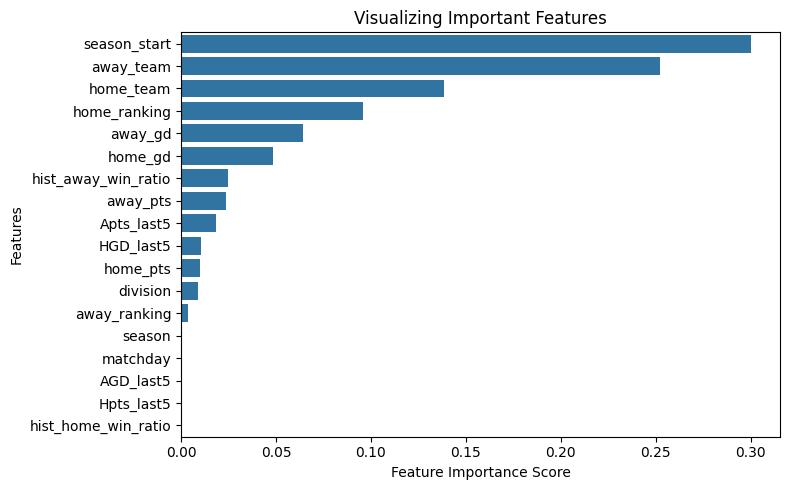

In [134]:
# --------------------------------------------------
# Feature importances (usar el modelo entrenado)
# --------------------------------------------------

# features importances
importances = best_model_dt.feature_importances_

# name columns
feature_names = getattr(X_train, "columns", [f"f{i}" for i in range(len(importances))])
feature_scores = (
    pd.Series(importances, index=feature_names)
      .sort_values(ascending=False)
)

print('Feature Importances:\n', feature_scores)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()

In [135]:
# --------------------------------
# PLot Tree
# --------------------------------
plt.figure(figsize=(30, 30))
plot_tree(
    best_model_dt,
    filled=True,
    feature_names=X.columns,
    class_names=["1 (Local)", "2 (Visitante)", "X (Empate)"],
    rounded=True,
    fontsize=10  # puedes subirlo a 12–14 si aún se ve chico
)
plt.title("Decision Tree - Mejor Modelo (Tuning)")
plt.show()

In [136]:
# --------------------------------
# Text Representation
# --------------------------------
text_representation_dt = export_text(best_model_dt, feature_names=list(X.columns))
print(text_representation_dt)

|--- away_team <= 0.66
|   |--- season_start <= 0.63
|   |   |--- home_ranking <= 0.20
|   |   |   |--- away_team <= 0.54
|   |   |   |   |--- away_pts <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- away_pts >  0.42
|   |   |   |   |   |--- class: 0
|   |   |   |--- away_team >  0.54
|   |   |   |   |--- home_ranking <= 0.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- home_ranking >  0.11
|   |   |   |   |   |--- class: 0
|   |   |--- home_ranking >  0.20
|   |   |   |--- Apts_last5 <= 0.63
|   |   |   |   |--- home_ranking <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- home_ranking >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Apts_last5 >  0.63
|   |   |   |   |--- season_start <= 0.42
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- season_start >  0.42
|   |   |   |   |   |--- class: 0
|   |--- season_start >  0.63
|   |   |--- home_team <= 0.27
|   |   |   |--- hist_away_win_ratio <= 0.17
|   |   |   |   |--- HGD_last5 

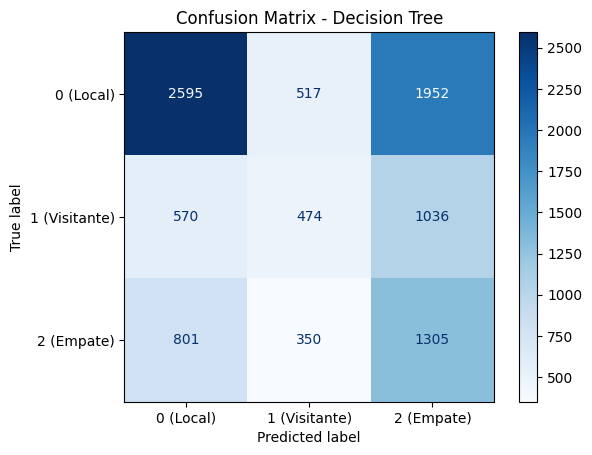

In [137]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=display_names)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [138]:
# --------------------------------
# Classification Report
# --------------------------------
print('Classification Report:\n', classification_report(y_test, y_pred_dt, labels=[0, 1, 2],target_names=["1 (Local)", "2 (Visitante)", "3 (Empate)"],digits=4))

Classification Report:
                precision    recall  f1-score   support

    1 (Local)     0.6543    0.5124    0.5748      5064
2 (Visitante)     0.3535    0.2279    0.2771      2080
   3 (Empate)     0.3040    0.5314    0.3867      2456

     accuracy                         0.4556      9600
    macro avg     0.4373    0.4239    0.4129      9600
 weighted avg     0.4995    0.4556    0.4622      9600



In [139]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_pred_new_dt = best_model_dt.predict(X_to_predict)

#### Random Forest:

In [140]:
# --------------------------------
# Definir Modelo (Tunning)
# --------------------------------

# 1) Definir el modelo
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 2) Cuadrícula de hiperparámetros
# param_grid_rf = {
#     'n_estimators': [100, 200],               # número de árboles
#     'criterion': ['gini', 'entropy'],         # función de impureza
#     'max_depth': [None, 5, 10],               # profundidad máxima
#     'min_samples_split': np.arange(2, 9, 2),  # mínimo de muestras para dividir
#     'min_samples_leaf': np.arange(1, 9, 2),   # mínimo de muestras por hoja
#     'max_features': ['sqrt', 'log2', None],   # número de features por split
#     'max_leaf_nodes': [None, 20, 50],         # nodos hoja máximos
#     'bootstrap': [True, False]                # si se usa bootstrap o no
# }

param_grid_rf = {
    'n_estimators': [200],        # suficiente para estabilidad sin disparar tiempo
    'criterion': ['gini'],        # 'gini' suele ser más rápido que 'entropy'
    'max_depth': [None, 10],      # sin límite o un tope razonable
    'min_samples_split': [2, 5],  # control de sobreajuste
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],     # estándar en clasificación
    'bootstrap': [True]           # permite OOB si lo usas
}

# 3) GridSearchCV (validación cruzada 5 pliegues)
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# 4) Ajustar el modelo
grid_search_rf.fit(X_train, y_train)

# 5) Resultados del tuning
print("Mejores parámetros encontrados:", grid_search_rf.best_params_)
print("Mejor modelo encontrado:", grid_search_rf.best_estimator_)

# 6) Evaluación
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Random Forest (Hyperparameter Tuning): {accuracy_rf:.4f}')

Mejores parámetros encontrados: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor modelo encontrado: RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)
Accuracy Random Forest (Hyperparameter Tuning): 0.5289


In [141]:
# --------------------------------------------------
# Feature importances (usar el modelo entrenado)
# --------------------------------------------------

# features importances
importances = best_model_rf.feature_importances_

# name columns
feature_names = getattr(X_train, "columns", [f"f{i}" for i in range(len(importances))])
feature_scores = (
    pd.Series(importances, index=feature_names)
      .sort_values(ascending=False)
)

print('Feature Importances Random Forest:\n', feature_scores)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.xlabel('Feature Importance Score (Random Forest)')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()

Feature Importances Random Forest:
 home_team              0.079086
away_team              0.078853
season                 0.068574
season_start           0.066910
away_gd                0.063403
home_gd                0.062986
away_pts               0.059602
home_pts               0.058519
AGD_last5              0.053706
home_ranking           0.053394
HGD_last5              0.053332
away_ranking           0.052724
matchday               0.052526
hist_away_win_ratio    0.048287
Apts_last5             0.046339
hist_home_win_ratio    0.046317
Hpts_last5             0.044943
division               0.010501
dtype: float64


In [142]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=display_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [143]:
# --------------------------------
# Classification Report
# --------------------------------
print('Classification Report:\n', classification_report(y_test, y_pred_rf, labels=[0, 1, 2],target_names=["1 (Local)", "2 (Visitante)", "3 (Empate)"],digits=4))

Classification Report:
                precision    recall  f1-score   support

    1 (Local)     0.5545    0.9072    0.6883      5064
2 (Visitante)     0.4086    0.1418    0.2106      2080
   3 (Empate)     0.3170    0.0765    0.1233      2456

     accuracy                         0.5289      9600
    macro avg     0.4267    0.3752    0.3407      9600
 weighted avg     0.4621    0.5289    0.4402      9600



In [144]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_pred_new_rf = best_model_rf.predict(X_to_predict)

#### Xgboost:

In [145]:
# --------------------------------
# Definir Modelo (Tuning)
# --------------------------------

# Asegurar que las etiquetas sean int (CRÍTICO para XGBoost)
y_train = y_train.astype(int)   # <-- importante
y_test  = y_test.astype(int)    # <-- importante

# Calcular pesos de clase balanceados
weights = compute_sample_weight(class_weight='balanced', y=y_train)

# 1) Modelo base
model_xgb = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',     # métrica estándar para multiclase
    use_label_encoder=False
)

# 2) Cuadrícula de hiperparámetros
param_grid_xgb = {
    'objective': ['multi:softmax'],           # función objetivo multiclase
    'num_class': [len(np.unique(y_train))],   # número de clases detectado automáticamente
    'n_estimators': np.arange(100, 301, 100), # número de árboles
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


# 3) GridSearchCV (validación cruzada 5 pliegues)
grid_search_xgb = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 4) Ajustar el modelo
grid_search_xgb.fit(X_train, y_train, sample_weight=weights)

# 5) Resultados del tuning
print("Mejores parámetros encontrados:", grid_search_xgb.best_params_)
print("Mejor modelo encontrado:", grid_search_xgb.best_estimator_)

# 6) Evaluación
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy XGBoost (Hyperparameter Tuning): {accuracy_xgb:.4f}')

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:26:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': np.int64(300), 'num_class': 3, 'objective': 'multi:softmax', 'subsample': 0.7}
Mejor modelo encontrado: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(300), n_jobs=None,
              num_class=3, ...)
Accuracy X

In [146]:
# --------------------------------------------------
# Feature importances (usar el modelo entrenado)
# --------------------------------------------------

# features importances
importances = best_model_xgb.feature_importances_

# name columns
feature_names = getattr(X_train, "columns", [f"f{i}" for i in range(len(importances))])
feature_scores = (
    pd.Series(importances, index=feature_names)
      .sort_values(ascending=False)
)

print('Feature Importances Random Forest:\n', feature_scores)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.xlabel('Feature Importance Score (Xgboot)')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()

Feature Importances Random Forest:
 away_gd                0.059488
home_gd                0.059289
season_start           0.057532
away_pts               0.057268
home_pts               0.056945
season                 0.056426
away_team              0.056186
Hpts_last5             0.055477
Apts_last5             0.055386
home_team              0.055351
away_ranking           0.054982
AGD_last5              0.054586
home_ranking           0.054392
HGD_last5              0.054087
hist_home_win_ratio    0.053903
matchday               0.053487
hist_away_win_ratio    0.052906
division               0.052310
dtype: float32


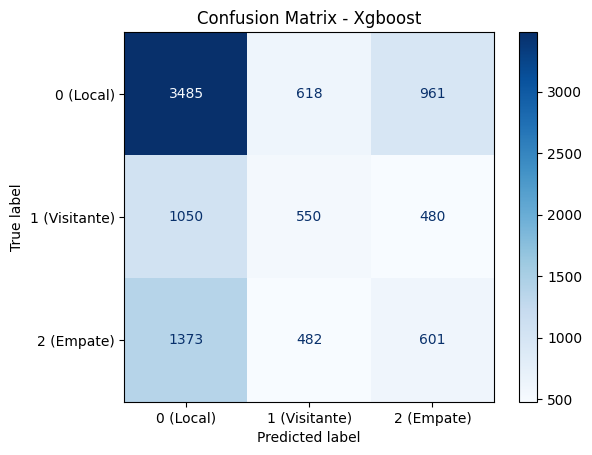

In [147]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=display_names)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Xgboost")
plt.show()

In [148]:
# --------------------------------
# Clasification report
# --------------------------------
print(f' Classification Report: {classification_report(y_test, y_pred_xgb)}')

 Classification Report:               precision    recall  f1-score   support

           0       0.59      0.69      0.64      5064
           1       0.33      0.26      0.29      2080
           2       0.29      0.24      0.27      2456

    accuracy                           0.48      9600
   macro avg       0.41      0.40      0.40      9600
weighted avg       0.46      0.48      0.47      9600



In [149]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_pred_new_xgb = best_model_xgb.predict(X_to_predict)

#### Neural Network (NN):


========== Entrenando modelo con 10 epochs y batch size 16 ==========
Epoch 1/10


c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2376/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4050 - loss: 1.0808
Epoch 1: val_accuracy improved from -inf to 0.46427, saving model to best_dense_model_multiclass.keras
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4051 - loss: 1.0808 - val_accuracy: 0.4643 - val_loss: 1.0506 - learning_rate: 0.0010
Epoch 2/10
2373/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4406 - loss: 1.0703
Epoch 2: val_accuracy did not improve from 0.46427
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4405 - loss: 1.0703 - val_accuracy: 0.3898 - val_loss: 1.0975 - learning_rate: 0.0010
Epoch 3/10
2359/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.4448 - loss: 1.0610
Epoch 3: val_accuracy did not improve from 0.46427
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4448 - loss: 1.0610 - val_accuracy: 0.4370 - val_loss: 1.0728 - learning_rate: 0.0010
Epoch 4/10
2358/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.4428 - loss: 1.0633
Epoch 4: val_accuracy

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1182/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.3521 - loss: 1.0938
Epoch 1: val_accuracy did not improve from 0.46427
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3529 - loss: 1.0936 - val_accuracy: 0.4206 - val_loss: 1.0743 - learning_rate: 0.0010
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.4361 - loss: 1.0712
Epoch 2: val_accuracy improved from 0.46427 to 0.48698, saving model to best_dense_model_multiclass.keras
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4361 - loss: 1.0712 - val_accuracy: 0.4870 - val_loss: 1.0155 - learning_rate: 0.0010
Epoch 3/10
1149/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.4551 - loss: 1.0594
Epoch 3: val_accuracy did not improve from 0.48698
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4548 - loss: 1.0595 - val_accuracy: 0.4621 - val_loss: 1.0459 - learning_rate: 0.0010
Epoch 4/10
1172/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4504 - loss: 1.0606
Epoch 4: val_acc

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


573/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4016 - loss: 1.0896
Epoch 1: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4022 - loss: 1.0893 - val_accuracy: 0.4082 - val_loss: 1.0743 - learning_rate: 0.0010
Epoch 2/10
594/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4310 - loss: 1.0680
Epoch 2: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4310 - loss: 1.0680 - val_accuracy: 0.4208 - val_loss: 1.0733 - learning_rate: 0.0010
Epoch 3/10
594/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4516 - loss: 1.0582
Epoch 3: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4515 - loss: 1.0583 - val_accuracy: 0.4532 - val_loss: 1.0419 - learning_rate: 0.0010
Epoch 4/10
596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4436 - loss: 1.0623
Epoch 4: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2351/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.3885 - loss: 1.0868
Epoch 1: val_accuracy did not improve from 0.48958
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3890 - loss: 1.0867 - val_accuracy: 0.4165 - val_loss: 1.0700 - learning_rate: 0.0010
Epoch 2/20
2347/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.4410 - loss: 1.0655
Epoch 2: val_accuracy did not improve from 0.48958
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4411 - loss: 1.0655 - val_accuracy: 0.4083 - val_loss: 1.0621 - learning_rate: 0.0010
Epoch 3/20
2374/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.4471 - loss: 1.0638
Epoch 3: val_accuracy did not improve from 0.48958
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4471 - loss: 1.0638 - val_accuracy: 0.4439 - val_loss: 1.0539 - learning_rate: 0.0010
Epoch 4/20
2395/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4511 - loss: 1.0628
Epoch 4: val_accuracy did not improve from 0.48958
2400/2400 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1168/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.3996 - loss: 1.0865
Epoch 1: val_accuracy did not improve from 0.48958
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4001 - loss: 1.0862 - val_accuracy: 0.4236 - val_loss: 1.0669 - learning_rate: 0.0010
Epoch 2/20
1173/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.4377 - loss: 1.0683
Epoch 2: val_accuracy did not improve from 0.48958
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4378 - loss: 1.0682 - val_accuracy: 0.4082 - val_loss: 1.0881 - learning_rate: 0.0010
Epoch 3/20
1171/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.4547 - loss: 1.0622
Epoch 3: val_accuracy did not improve from 0.48958
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4546 - loss: 1.0622 - val_accuracy: 0.4343 - val_loss: 1.0615 - learning_rate: 0.0010
Epoch 4/20
1187/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.4562 - loss: 1.0580
Epoch 4: val_accuracy did not improve from 0.48958
1200/1200 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


559/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3859 - loss: 1.0903
Epoch 1: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3881 - loss: 1.0896 - val_accuracy: 0.4417 - val_loss: 1.0692 - learning_rate: 0.0010
Epoch 2/20
574/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4406 - loss: 1.0684
Epoch 2: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4406 - loss: 1.0684 - val_accuracy: 0.4774 - val_loss: 1.0269 - learning_rate: 0.0010
Epoch 3/20
581/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4440 - loss: 1.0652
Epoch 3: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4441 - loss: 1.0651 - val_accuracy: 0.4480 - val_loss: 1.0535 - learning_rate: 0.0010
Epoch 4/20
577/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4590 - loss: 1.0606
Epoch 4: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2389/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.3978 - loss: 1.0894
Epoch 1: val_accuracy did not improve from 0.48958
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3979 - loss: 1.0893 - val_accuracy: 0.4694 - val_loss: 1.0460 - learning_rate: 0.0010
Epoch 2/30
2372/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.4461 - loss: 1.0610
Epoch 2: val_accuracy did not improve from 0.48958
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4461 - loss: 1.0611 - val_accuracy: 0.4824 - val_loss: 1.0313 - learning_rate: 0.0010
Epoch 3/30
2398/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.4491 - loss: 1.0652
Epoch 3: val_accuracy did not improve from 0.48958
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4491 - loss: 1.0652 - val_accuracy: 0.4665 - val_loss: 1.0292 - learning_rate: 0.0010
Epoch 4/30
2386/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.4430 - loss: 1.0643
Epoch 4: val_accuracy did not improve from 0.48958
2400/2400 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1195/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.3960 - loss: 1.0860
Epoch 1: val_accuracy did not improve from 0.48958
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3962 - loss: 1.0860 - val_accuracy: 0.4065 - val_loss: 1.0809 - learning_rate: 0.0010
Epoch 2/30
1181/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.4600 - loss: 1.0628
Epoch 2: val_accuracy did not improve from 0.48958
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4598 - loss: 1.0628 - val_accuracy: 0.4873 - val_loss: 1.0296 - learning_rate: 0.0010
Epoch 3/30
1146/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.4505 - loss: 1.0663
Epoch 3: val_accuracy did not improve from 0.48958
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4506 - loss: 1.0662 - val_accuracy: 0.4276 - val_loss: 1.0736 - learning_rate: 0.0010
Epoch 4/30
1185/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.4574 - loss: 1.0621
Epoch 4: val_accuracy did not improve from 0.48958
1200/1200 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


568/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4038 - loss: 1.0885
Epoch 1: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4049 - loss: 1.0880 - val_accuracy: 0.4282 - val_loss: 1.0629 - learning_rate: 0.0010
Epoch 2/30
574/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4384 - loss: 1.0697
Epoch 2: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4386 - loss: 1.0697 - val_accuracy: 0.4323 - val_loss: 1.0637 - learning_rate: 0.0010
Epoch 3/30
573/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4421 - loss: 1.0644
Epoch 3: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4422 - loss: 1.0644 - val_accuracy: 0.4624 - val_loss: 1.0370 - learning_rate: 0.0010
Epoch 4/30
566/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4442 - loss: 1.0638
Epoch 4: val_accuracy did not improve from 0.48958
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2387/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.3992 - loss: 1.0833
Epoch 1: val_accuracy did not improve from 0.49854
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3993 - loss: 1.0832 - val_accuracy: 0.4340 - val_loss: 1.0698 - learning_rate: 0.0010
Epoch 2/40
2369/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.4480 - loss: 1.0655
Epoch 2: val_accuracy did not improve from 0.49854
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4481 - loss: 1.0655 - val_accuracy: 0.4547 - val_loss: 1.0452 - learning_rate: 0.0010
Epoch 3/40
2342/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.4555 - loss: 1.0635
Epoch 3: val_accuracy did not improve from 0.49854
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4555 - loss: 1.0634 - val_accuracy: 0.4341 - val_loss: 1.0839 - learning_rate: 0.0010
Epoch 4/40
2374/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.4548 - loss: 1.0651
Epoch 4: val_accuracy did not improve from 0.49854
2400/2400 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1159/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.4037 - loss: 1.0837
Epoch 1: val_accuracy did not improve from 0.49854
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4046 - loss: 1.0834 - val_accuracy: 0.4498 - val_loss: 1.0541 - learning_rate: 0.0010
Epoch 2/40
1166/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4388 - loss: 1.0674
Epoch 2: val_accuracy improved from 0.49854 to 0.50323, saving model to best_dense_model_multiclass.keras
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4389 - loss: 1.0674 - val_accuracy: 0.5032 - val_loss: 1.0133 - learning_rate: 0.0010
Epoch 3/40
1169/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.4548 - loss: 1.0623
Epoch 3: val_accuracy did not improve from 0.50323
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4547 - loss: 1.0623 - val_accuracy: 0.4617 - val_loss: 1.0369 - learning_rate: 0.0010
Epoch 4/40
1160/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.4490 - loss: 1.0640
Epoch 4: val_a

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


557/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4058 - loss: 1.0894
Epoch 1: val_accuracy did not improve from 0.50323
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4069 - loss: 1.0888 - val_accuracy: 0.4487 - val_loss: 1.0644 - learning_rate: 0.0010
Epoch 2/40
576/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4331 - loss: 1.0747
Epoch 2: val_accuracy did not improve from 0.50323
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4333 - loss: 1.0744 - val_accuracy: 0.4848 - val_loss: 1.0334 - learning_rate: 0.0010
Epoch 3/40
551/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4491 - loss: 1.0616
Epoch 3: val_accuracy did not improve from 0.50323
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4487 - loss: 1.0618 - val_accuracy: 0.4293 - val_loss: 1.0591 - learning_rate: 0.0010
Epoch 4/40
595/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4422 - loss: 1.0595
Epoch 4: val_accuracy did not improve from 0.50323
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2378/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.4027 - loss: 1.0865
Epoch 1: val_accuracy did not improve from 0.50323
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4030 - loss: 1.0864 - val_accuracy: 0.4390 - val_loss: 1.0479 - learning_rate: 0.0010
Epoch 2/50
2390/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.4486 - loss: 1.0627
Epoch 2: val_accuracy did not improve from 0.50323
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4486 - loss: 1.0628 - val_accuracy: 0.4567 - val_loss: 1.0499 - learning_rate: 0.0010
Epoch 3/50
2369/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.4472 - loss: 1.0608
Epoch 3: val_accuracy did not improve from 0.50323
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4472 - loss: 1.0609 - val_accuracy: 0.4690 - val_loss: 1.0534 - learning_rate: 0.0010
Epoch 4/50
2393/2400 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.4509 - loss: 1.0630
Epoch 4: val_accuracy did not improve from 0.50323
2400/2400 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1194/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.4069 - loss: 1.0851
Epoch 1: val_accuracy did not improve from 0.50323
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4070 - loss: 1.0851 - val_accuracy: 0.4145 - val_loss: 1.0745 - learning_rate: 0.0010
Epoch 2/50
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.4385 - loss: 1.0699
Epoch 2: val_accuracy did not improve from 0.50323
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4385 - loss: 1.0699 - val_accuracy: 0.4369 - val_loss: 1.0594 - learning_rate: 0.0010
Epoch 3/50
1159/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.4467 - loss: 1.0626
Epoch 3: val_accuracy did not improve from 0.50323
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4468 - loss: 1.0625 - val_accuracy: 0.4019 - val_loss: 1.0825 - learning_rate: 0.0010
Epoch 4/50
1159/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.4377 - loss: 1.0658
Epoch 4: val_accuracy did not improve from 0.50323
1200/1200 ━━━━━━━━

c:\Users\valeu\Desktop\MESIO\Q4\RN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


575/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3851 - loss: 1.0912
Epoch 1: val_accuracy did not improve from 0.50323
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3864 - loss: 1.0907 - val_accuracy: 0.4306 - val_loss: 1.0659 - learning_rate: 0.0010
Epoch 2/50
565/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 1.0708
Epoch 2: val_accuracy did not improve from 0.50323
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4380 - loss: 1.0706 - val_accuracy: 0.4598 - val_loss: 1.0436 - learning_rate: 0.0010
Epoch 3/50
565/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4469 - loss: 1.0665
Epoch 3: val_accuracy did not improve from 0.50323
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4470 - loss: 1.0664 - val_accuracy: 0.4679 - val_loss: 1.0410 - learning_rate: 0.0010
Epoch 4/50
551/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4457 - loss: 1.0639
Epoch 4: val_accuracy did not improve from 0.50323
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

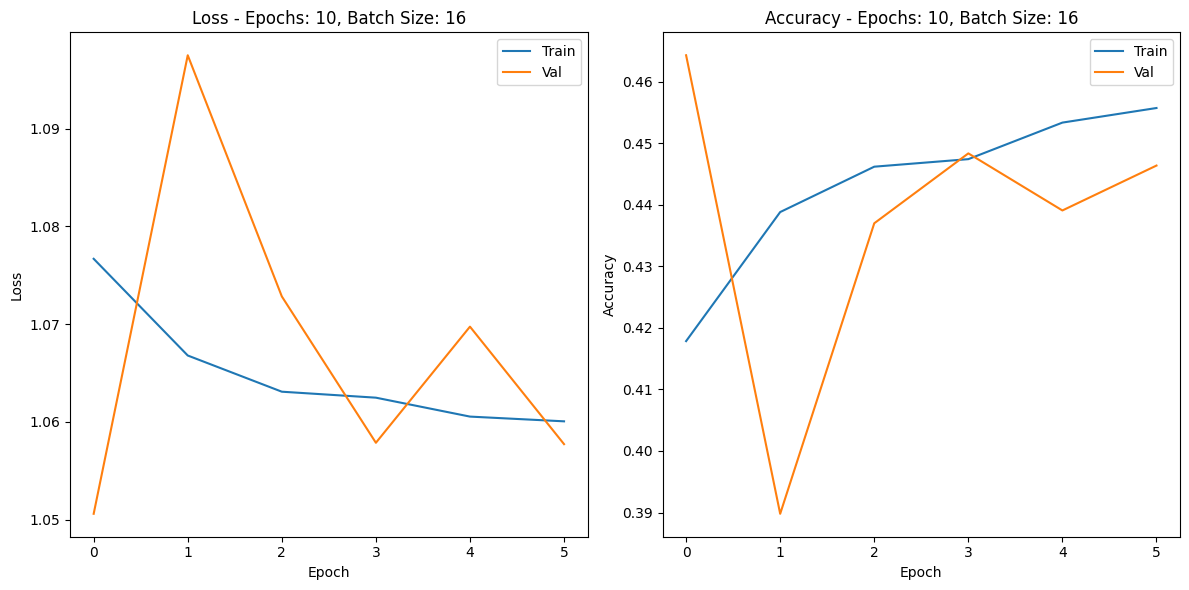


Epochs: 10, Batch Size: 32, Test Loss: 1.0155, Test Accuracy: 0.4870


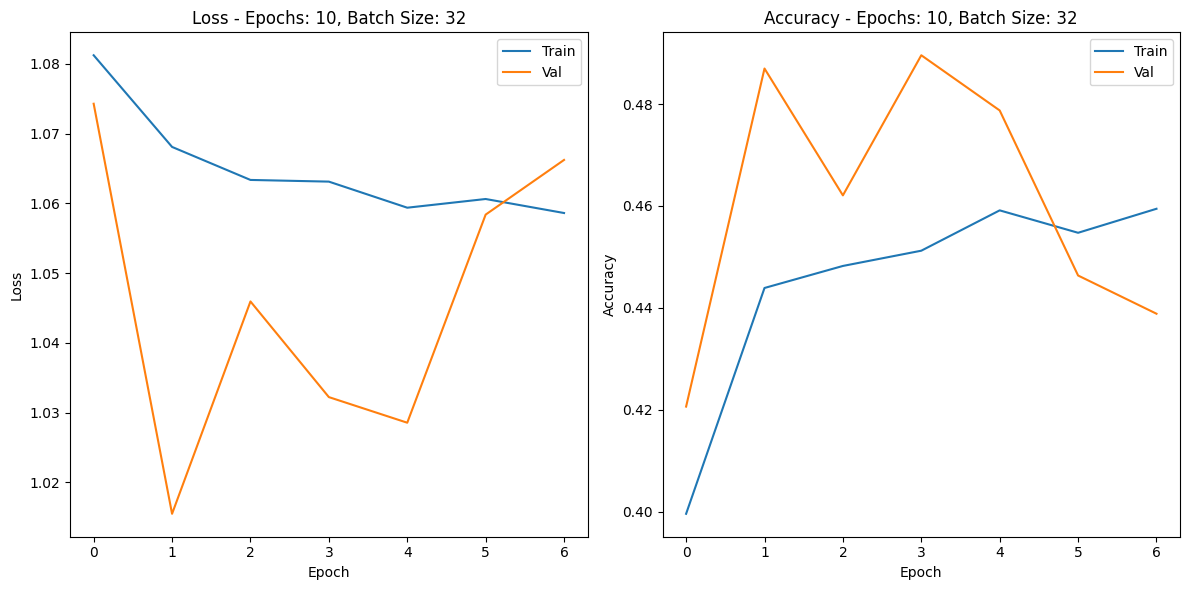


Epochs: 10, Batch Size: 64, Test Loss: 1.0419, Test Accuracy: 0.4532


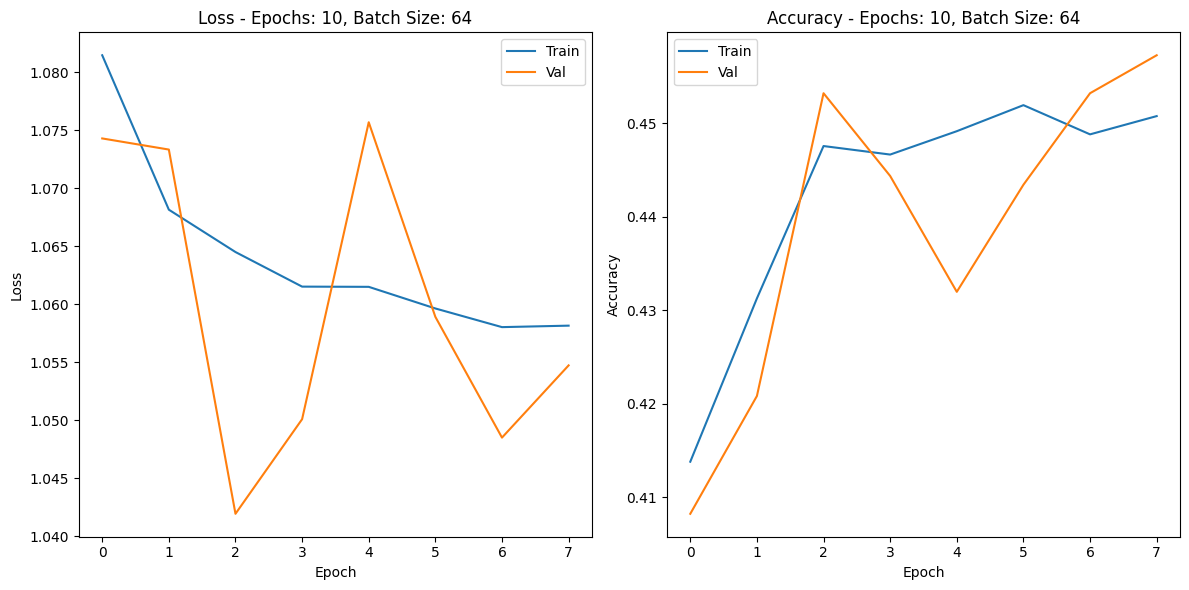


Epochs: 20, Batch Size: 16, Test Loss: 1.0241, Test Accuracy: 0.4808



Epochs: 20, Batch Size: 32, Test Loss: 1.0304, Test Accuracy: 0.4671


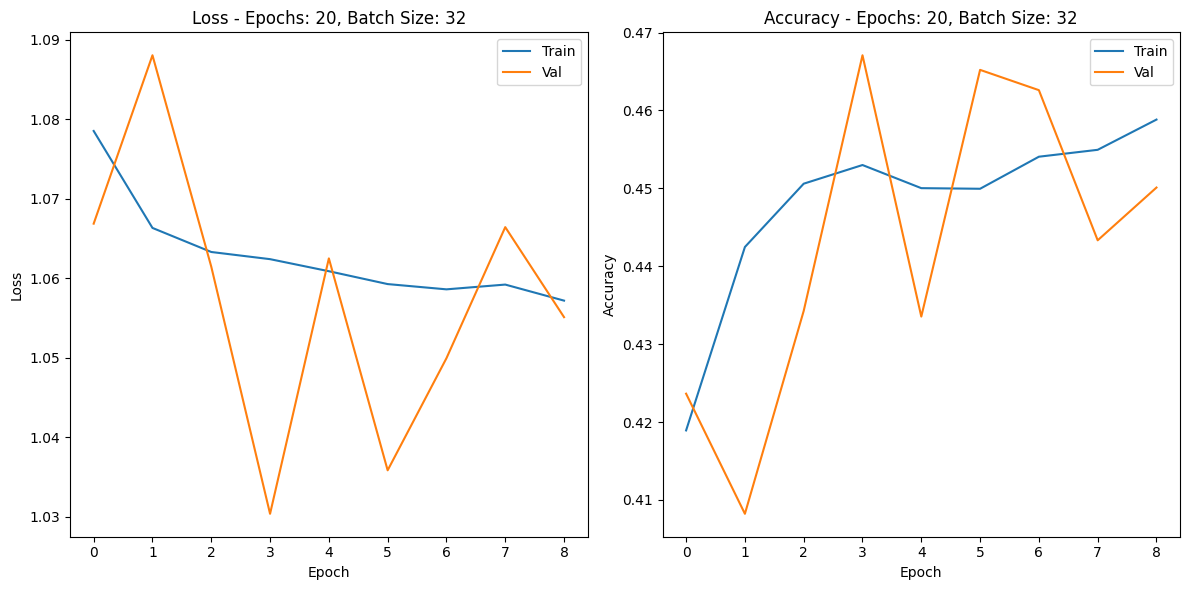


Epochs: 20, Batch Size: 64, Test Loss: 1.0269, Test Accuracy: 0.4774


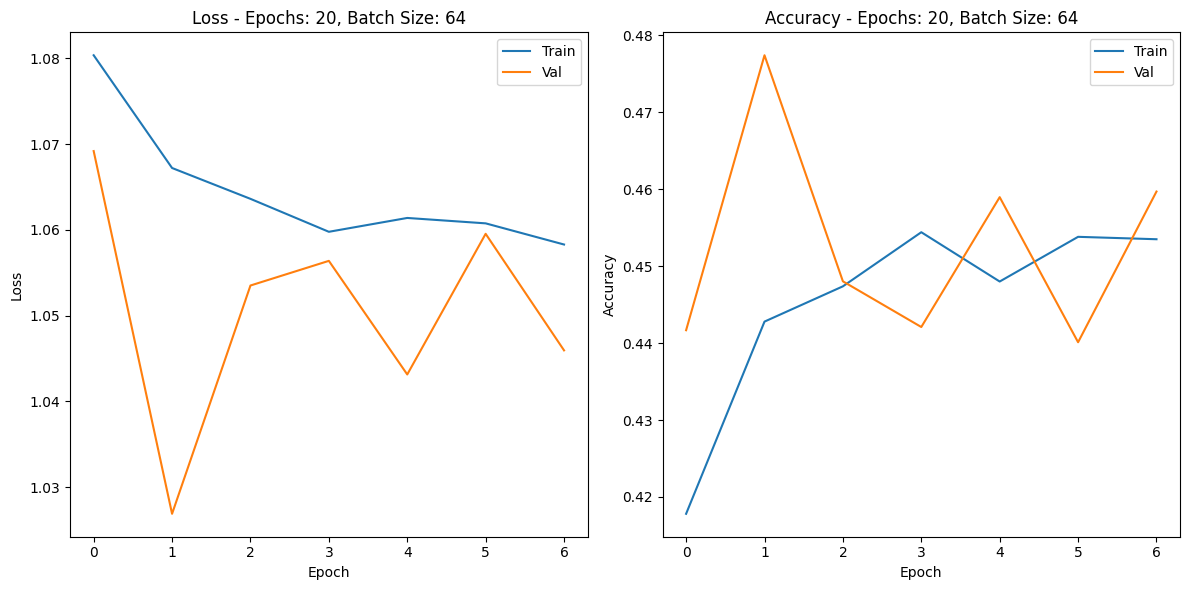


Epochs: 30, Batch Size: 16, Test Loss: 1.0292, Test Accuracy: 0.4665



Epochs: 30, Batch Size: 32, Test Loss: 1.0296, Test Accuracy: 0.4873


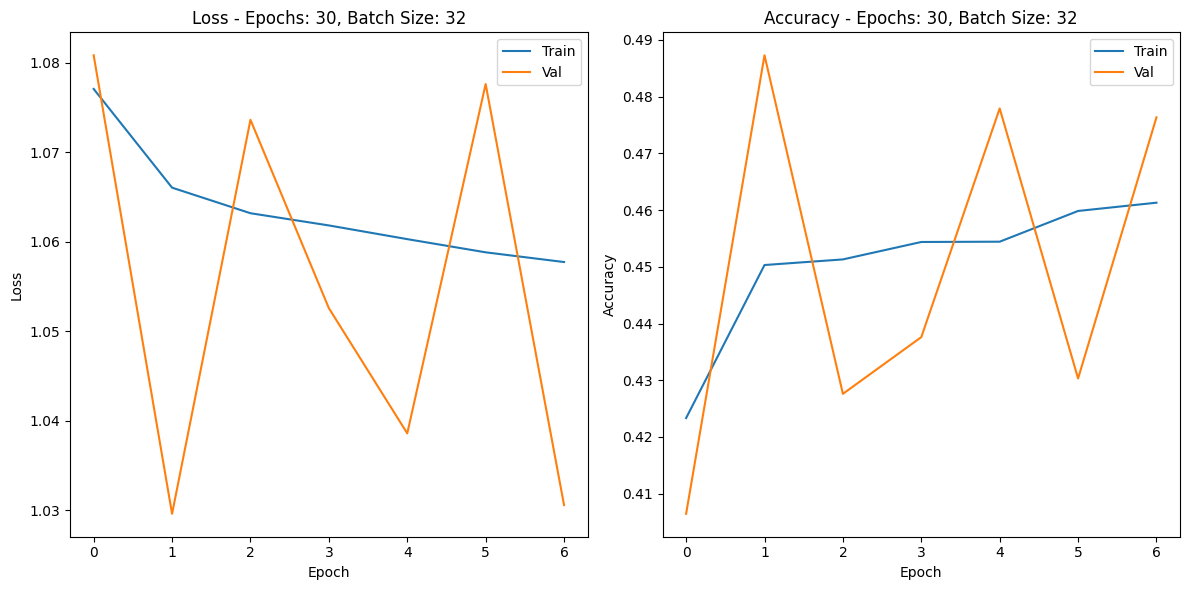


Epochs: 30, Batch Size: 64, Test Loss: 1.0212, Test Accuracy: 0.4985


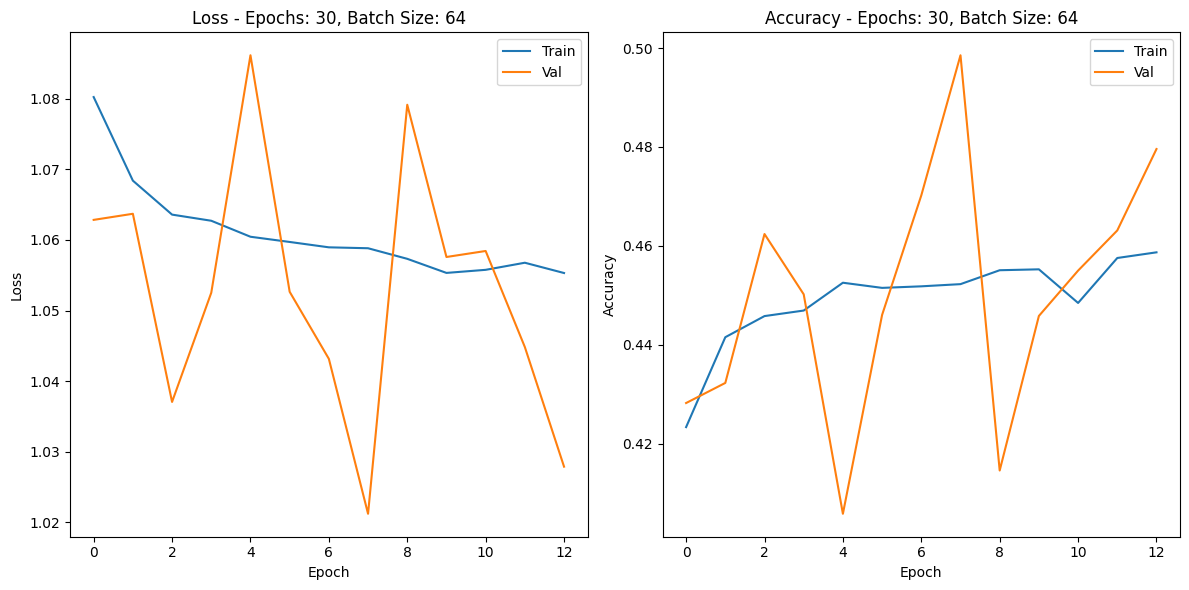


Epochs: 40, Batch Size: 16, Test Loss: 1.0270, Test Accuracy: 0.4980


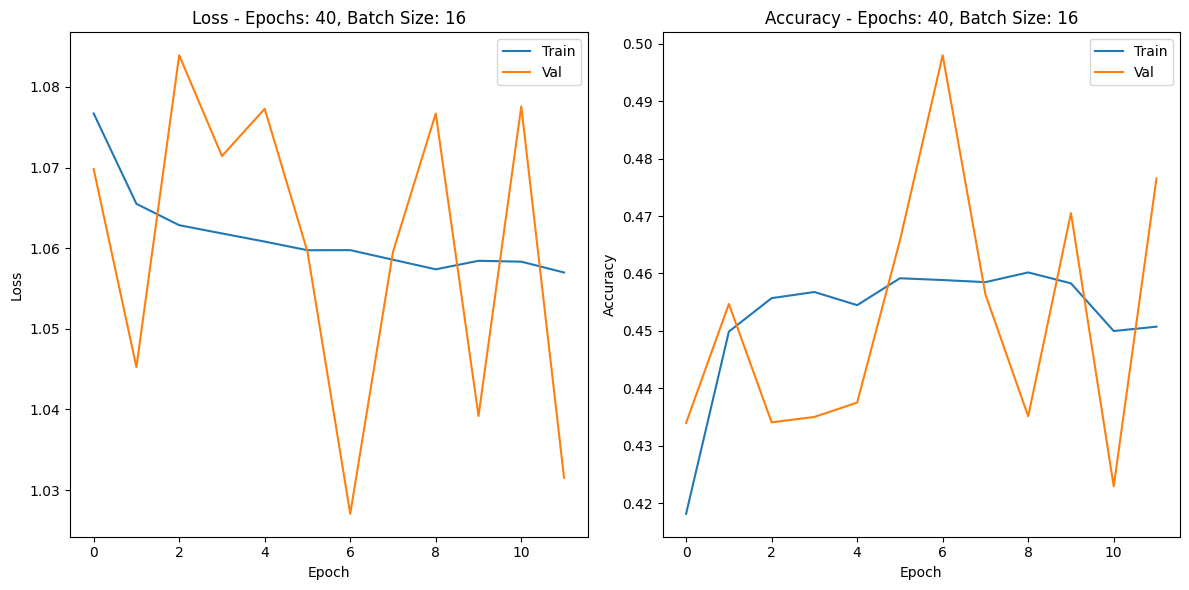


Epochs: 40, Batch Size: 32, Test Loss: 1.0133, Test Accuracy: 0.5032


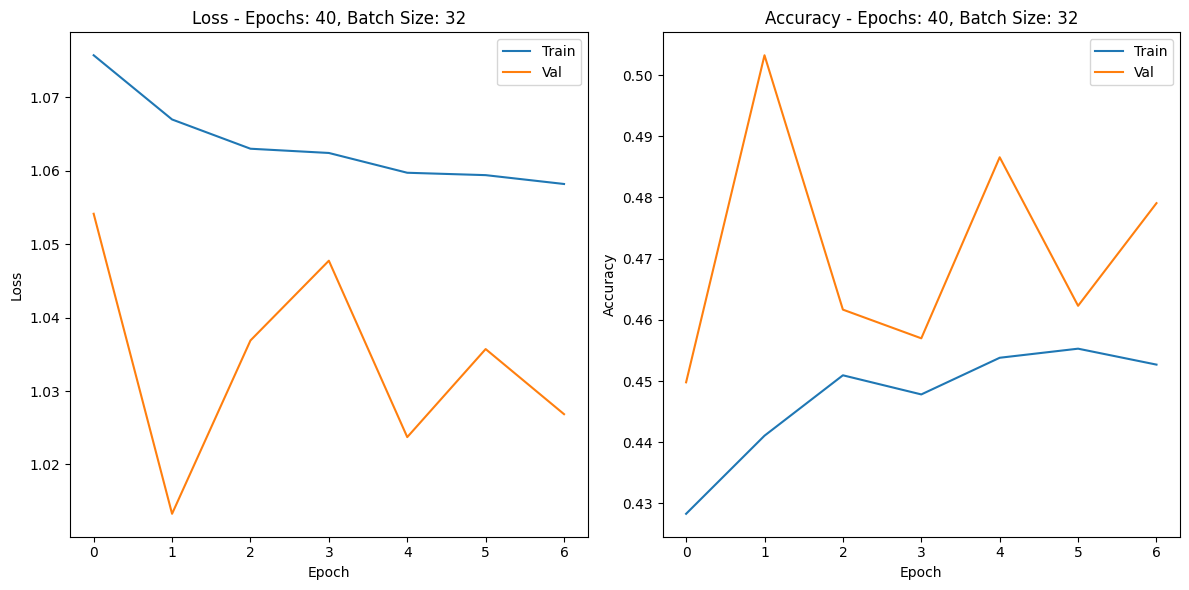


Epochs: 40, Batch Size: 64, Test Loss: 1.0226, Test Accuracy: 0.4814


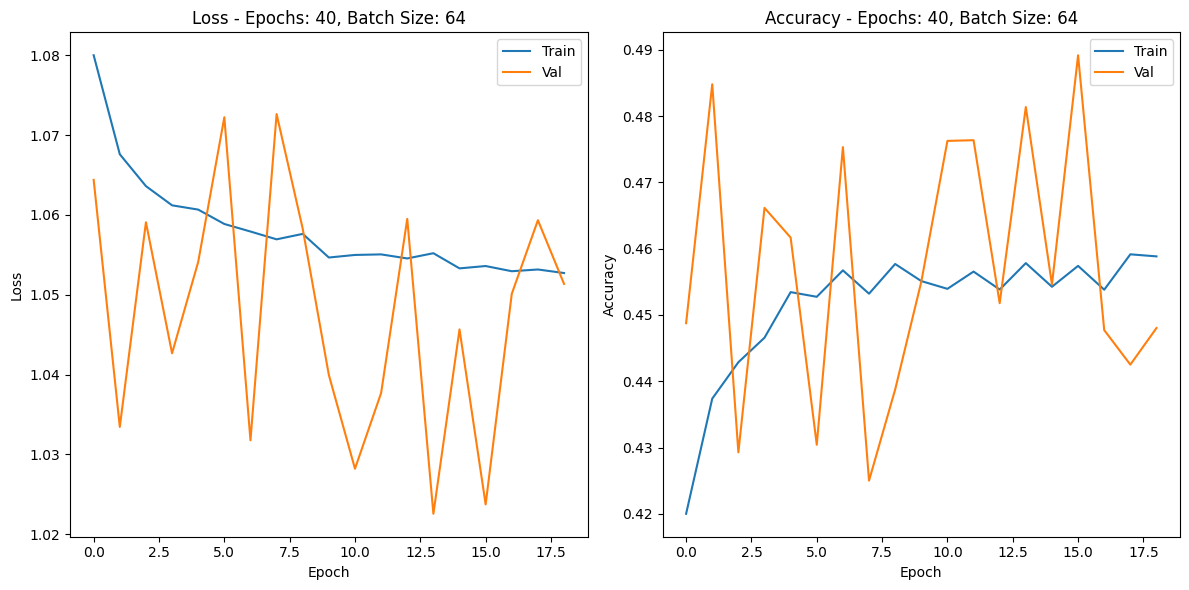


Epochs: 50, Batch Size: 16, Test Loss: 1.0479, Test Accuracy: 0.4390


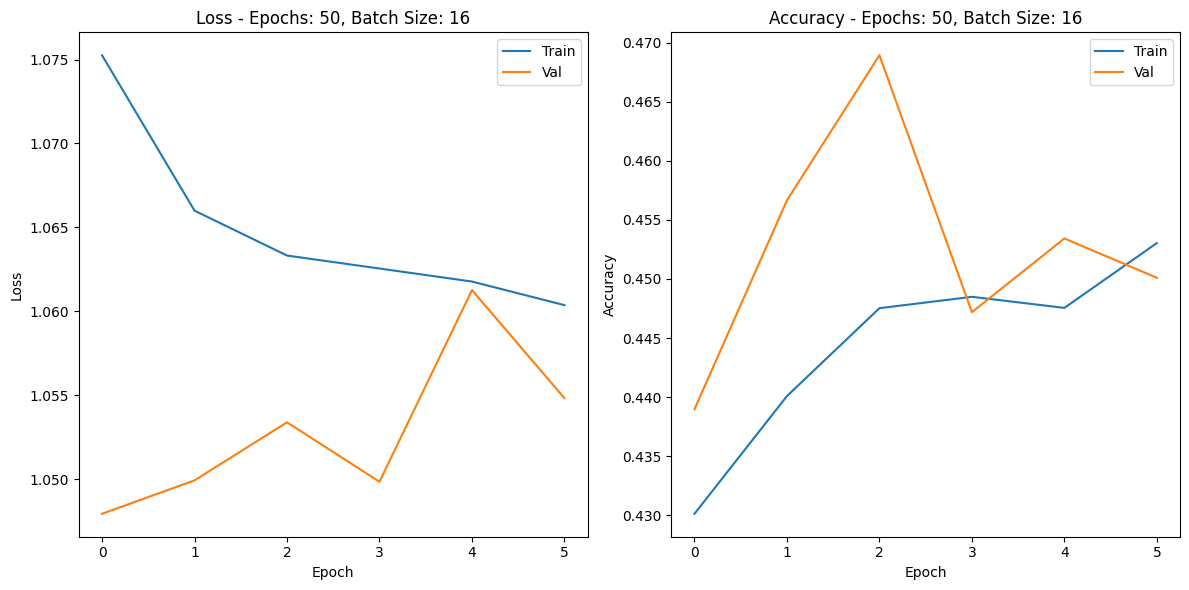


Epochs: 50, Batch Size: 32, Test Loss: 1.0321, Test Accuracy: 0.4677


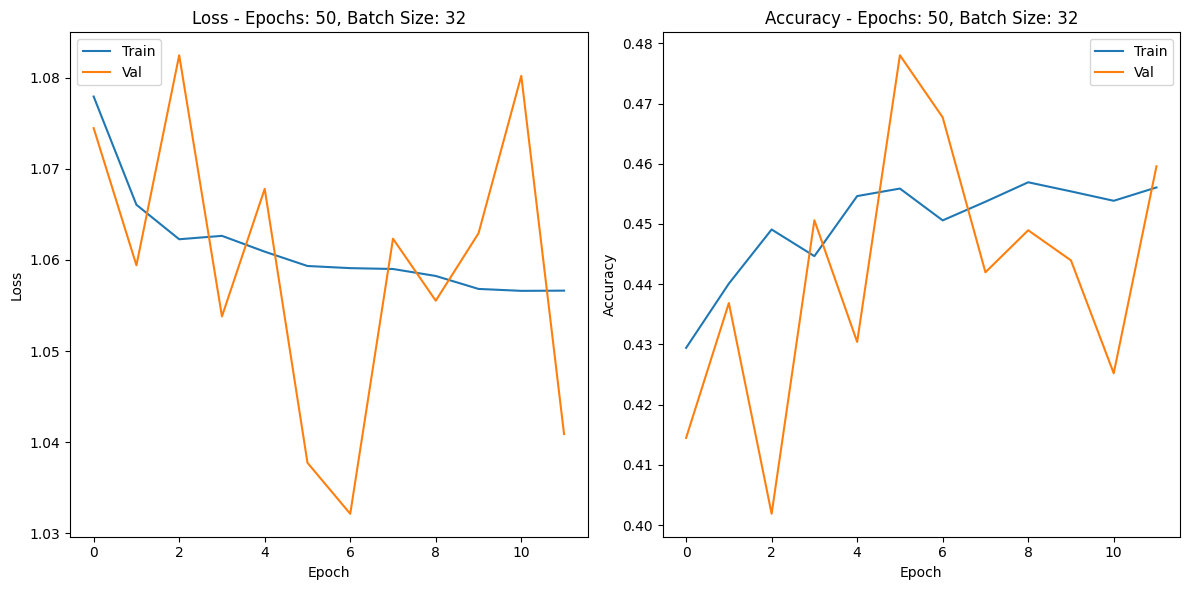


Epochs: 50, Batch Size: 64, Test Loss: 1.0410, Test Accuracy: 0.4679



========== Mejor Modelo ==========
Accuracy: 0.5032 con Epochs: 40 y Batch Size: 32
Test Loss: 1.0133


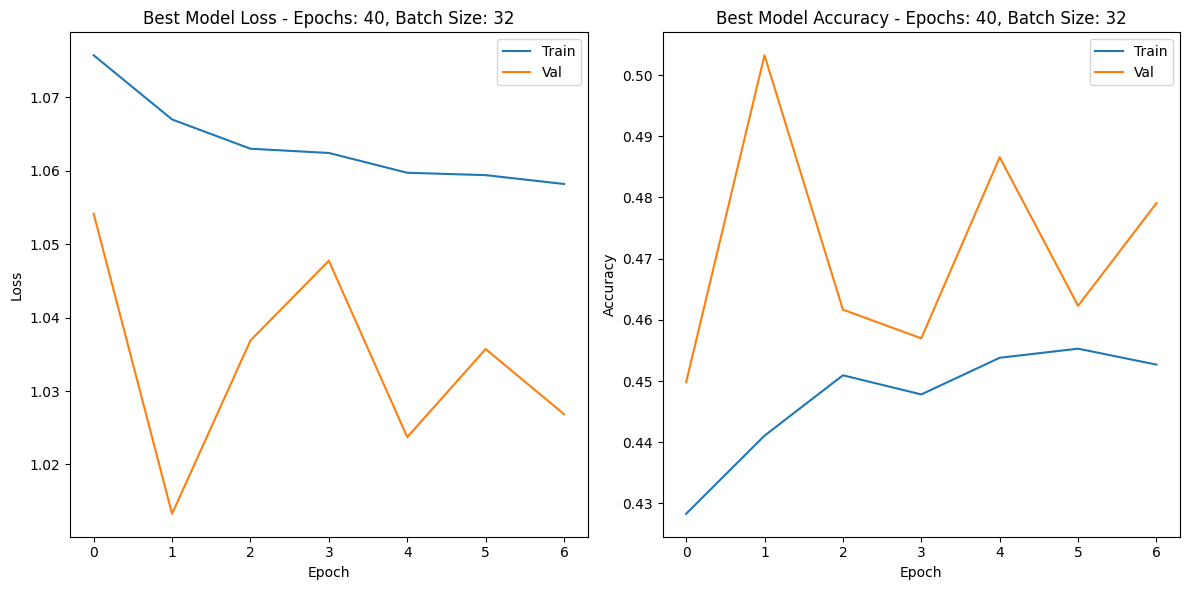

In [150]:
###################
# Implement a ANN #
###################

# Paso 2: Definir el modelo con capas densas para clasificación multiclase
def model(input_shape, num_classes=3):
    model = models.Sequential()

    # Capa densa 1
    model.add(layers.Dense(128, activation='relu', input_shape=input_shape))
    model.add(layers.Dropout(0.3))

    # Capa densa 2
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Capa densa 3
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Capa de salida para clasificación multiclase (softmax)
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compilación
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Para clasificación multiclase
                  metrics=['accuracy'])
    
    return model

# Paso 3: Definir callbacks
# Early Stopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

# To save the best model
model_checkpoint_callback = ModelCheckpoint(
    'best_dense_model_multiclass.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Learning Rate
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)

# Paso 4: Probar combinaciones de epochs y batch_size
epochs_values = [10, 20, 30, 40, 50]
batch_sizes = [16, 32, 64]

# Diccionario para almacenar los resultados
results = {}

# Balanceo de clases
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

for epochs in epochs_values:
    for batch_size in batch_sizes:
        print(f"\n========== Entrenando modelo con {epochs} epochs y batch size {batch_size} ==========")
        
        # Crear el modelo
        dense_model = model(input_shape=(X_train.shape[1],))  # Ajustar input_shape según tus datos
        
        history = dense_model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test),
            callbacks=[early_stopping_callback, model_checkpoint_callback, reduce_lr_callback],
            verbose=1,
            class_weight=class_weights_dict  # <<< LÍNEA AÑADIDA
        )
        
        score = dense_model.evaluate(X_test, y_test, verbose=0)
        
        results[(epochs, batch_size)] = {
            "test_loss": score[0],
            "test_accuracy": score[1],
            "history": history,
            "model": dense_model
        }

# Paso 5: Mostrar los resultados para todas las combinaciones de epochs y batch_size
best_acc = 0
best_params = None
best_result = None
best_model = None

for (epochs, batch_size), result in results.items():
    print(f"\nEpochs: {epochs}, Batch Size: {batch_size}, Test Loss: {result['test_loss']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")
    
    plt.figure(figsize=(12, 6))

    # Gráfico de loss
    plt.subplot(1, 2, 1)
    plt.plot(result['history'].history['loss'])
    plt.plot(result['history'].history['val_loss'])
    plt.title(f'Loss - Epochs: {epochs}, Batch Size: {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'])

    # Gráfico de accuracy
    plt.subplot(1, 2, 2)
    plt.plot(result['history'].history['accuracy'])
    plt.plot(result['history'].history['val_accuracy'])
    plt.title(f'Accuracy - Epochs: {epochs}, Batch Size: {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'])

    plt.tight_layout()
    plt.show()

    if result['test_accuracy'] > best_acc:
        best_acc = result['test_accuracy']
        best_params = (epochs, batch_size)
        best_result = result
        best_model = result['model']

# Paso 6: Mostrar resultados del mejor modelo
print("\n========== Mejor Modelo ==========")
print(f"Accuracy: {best_acc:.4f} con Epochs: {best_params[0]} y Batch Size: {best_params[1]}")
print(f"Test Loss: {best_result['test_loss']:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(best_result['history'].history['loss'])
plt.plot(best_result['history'].history['val_loss'])
plt.title(f'Best Model Loss - Epochs: {best_params[0]}, Batch Size: {best_params[1]}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(best_result['history'].history['accuracy'])
plt.plot(best_result['history'].history['val_accuracy'])
plt.title(f'Best Model Accuracy - Epochs: {best_params[0]}, Batch Size: {best_params[1]}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])

plt.tight_layout()
plt.show()

In [151]:
# --------------------------------
# Summary the best model
# --------------------------------
best_model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_160 (Dense)               │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_120 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_121 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,603 (150.80 KB)

 Trainable params: 12,867 (50.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,736 (100.54 KB)

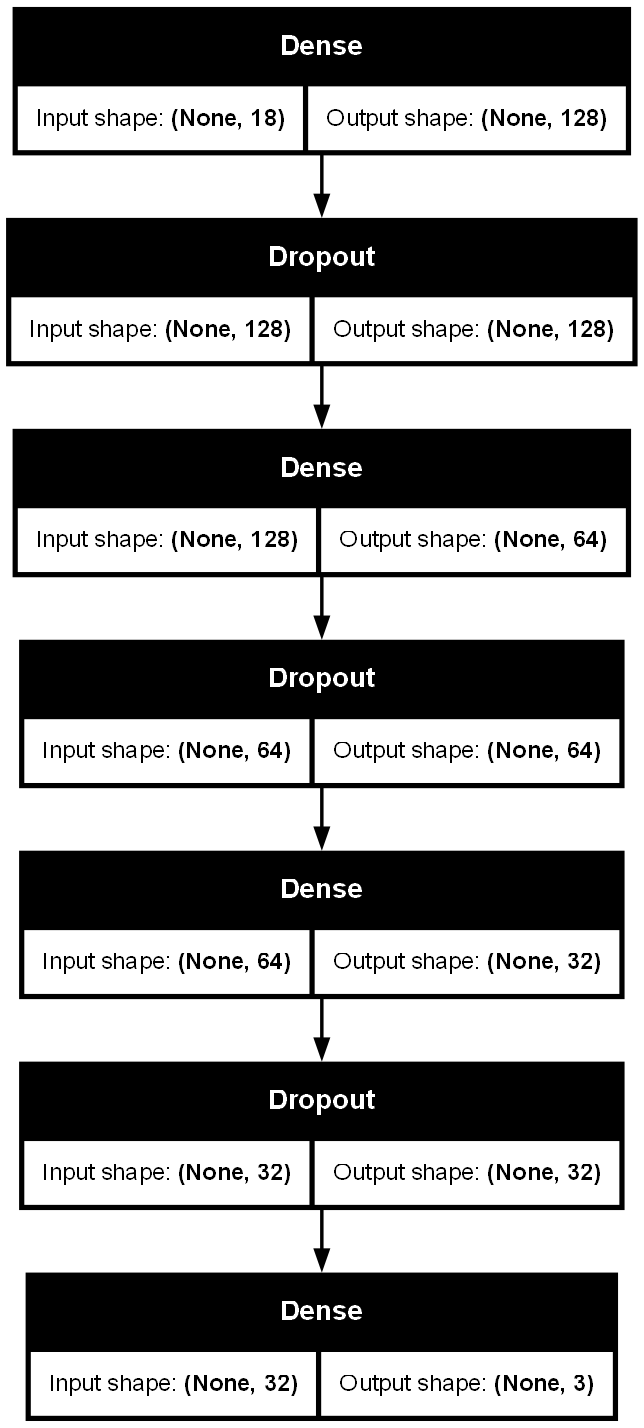

In [152]:
# --------------------------------
# Visualization
# --------------------------------
plot_model(best_model, show_shapes=True, dpi=125)

In [153]:
# --------------------------------
# Predict (test set)
# --------------------------------

# Paso 1: Predecir probabilidades con el mejor modelo
y_probs = best_model.predict(X_test)

# Paso 2: Convertir probabilidades a clases (máximo valor en cada fila)
y_pred_nn = np.argmax(y_probs, axis=1)

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step


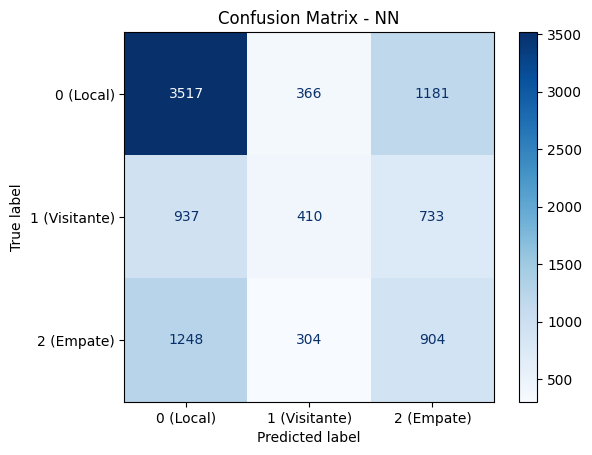

In [154]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=display_names)
disp_nn.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - NN")
plt.show()

In [155]:
# --------------------------------
# Clasification report
# --------------------------------
print(f' Classification Report: {classification_report(y_test, y_pred_nn)}')

 Classification Report:               precision    recall  f1-score   support

           0       0.62      0.69      0.65      5064
           1       0.38      0.20      0.26      2080
           2       0.32      0.37      0.34      2456

    accuracy                           0.50      9600
   macro avg       0.44      0.42      0.42      9600
weighted avg       0.49      0.50      0.49      9600



In [156]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_prob_new_nn = best_model.predict(X_to_predict)
y_pred_nn = np.argmax(y_prob_new_nn, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [157]:
y_test.value_counts()

result
0    5064
2    2456
1    2080
Name: count, dtype: int64

In [158]:
y_train.value_counts()

result
0    20257
2     9824
1     8319
Name: count, dtype: int64

### Dataset La Liga - Final

To predict match outcomes (home win, away win, or draw), several classification models were evaluated, including **Decision Tree**, **XGBoost**, **Neural Network**, and **Random Forest**. After the comparative analysis, the **Random Forest** model achieved the best performance in terms of **accuracy**, reaching a value of **0.5289**.

During the **hyperparameter tuning** process using *GridSearchCV*, the optimal configuration was found to be:  
`bootstrap=True`, `criterion='gini'`, `max_depth=None`, `max_features='sqrt'`, `min_samples_leaf=1`, `min_samples_split=2`, and `n_estimators=200`.

Given its superior performance and ability to generalize the patterns present in the data, the **Random Forest model** was selected as the **final predictive model** for estimating match results.

In [ ]:
# --------------------------------
# Definir Modelo (Tunning)
# --------------------------------

# 1) Definir el modelo
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 2) Cuadrícula de hiperparámetros
# param_grid_rf = {
#     'n_estimators': [100, 200],               # número de árboles
#     'criterion': ['gini', 'entropy'],         # función de impureza
#     'max_depth': [None, 5, 10],               # profundidad máxima
#     'min_samples_split': np.arange(2, 9, 2),  # mínimo de muestras para dividir
#     'min_samples_leaf': np.arange(1, 9, 2),   # mínimo de muestras por hoja
#     'max_features': ['sqrt', 'log2', None],   # número de features por split
#     'max_leaf_nodes': [None, 20, 50],         # nodos hoja máximos
#     'bootstrap': [True, False]                # si se usa bootstrap o no
# }

param_grid_rf = {
    'n_estimators': [200],        # suficiente para estabilidad sin disparar tiempo
    'criterion': ['gini'],        # 'gini' suele ser más rápido que 'entropy'
    'max_depth': [None, 10],      # sin límite o un tope razonable
    'min_samples_split': [2, 5],  # control de sobreajuste
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],     # estándar en clasificación
    'bootstrap': [True]           # permite OOB si lo usas
}

# 3) GridSearchCV (validación cruzada 5 pliegues)
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# 4) Ajustar el modelo
grid_search_rf.fit(X_train, y_train)

# 5) Resultados del tuning
print("Mejores parámetros encontrados:", grid_search_rf.best_params_)
print("Mejor modelo encontrado:", grid_search_rf.best_estimator_)

# 6) Evaluación
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Random Forest (Hyperparameter Tuning): {accuracy_rf:.4f}')

Mejores parámetros encontrados: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor modelo encontrado: RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)
Accuracy Random Forest (Hyperparameter Tuning): 0.5289


In [ ]:
# --------------------------------------------------
# Feature importances (usar el modelo entrenado)
# --------------------------------------------------

# features importances
importances = best_model_rf.feature_importances_

# name columns
feature_names = getattr(X_train, "columns", [f"f{i}" for i in range(len(importances))])
feature_scores = (
    pd.Series(importances, index=feature_names)
      .sort_values(ascending=False)
)

print('Feature Importances Random Forest:\n', feature_scores)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.xlabel('Feature Importance Score (Random Forest)')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.tight_layout()
plt.show()

Feature Importances Random Forest:
 home_team              0.079086
away_team              0.078853
season                 0.068574
season_start           0.066910
away_gd                0.063403
home_gd                0.062986
away_pts               0.059602
home_pts               0.058519
AGD_last5              0.053706
home_ranking           0.053394
HGD_last5              0.053332
away_ranking           0.052724
matchday               0.052526
hist_away_win_ratio    0.048287
Apts_last5             0.046339
hist_home_win_ratio    0.046317
Hpts_last5             0.044943
division               0.010501
dtype: float64


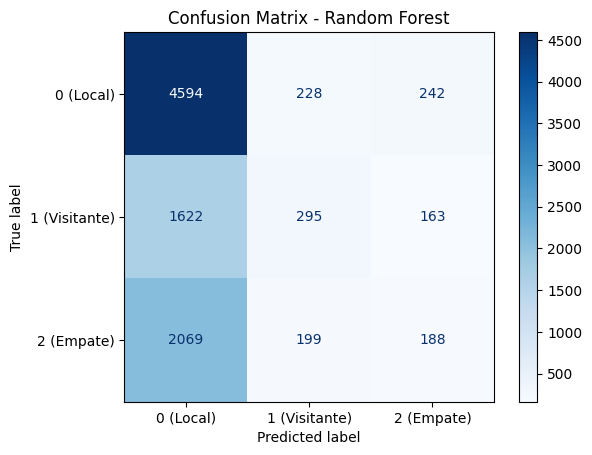

In [ ]:
# --------------------------------
# Confusion Matrix
# --------------------------------

# labels
labels_idx = [0, 1, 2]                                          # clases verdaderas
display_names = ['0 (Local)', '1 (Visitante)', '2 (Empate)']    # solo etiquetas visibles

# see confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=display_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# --------------------------------
# Classification Report
# --------------------------------
print('Classification Report:\n', classification_report(y_test, y_pred_rf, labels=[0, 1, 2],target_names=["1 (Local)", "2 (Visitante)", "3 (Empate)"],digits=4))

Classification Report:
                precision    recall  f1-score   support

    1 (Local)     0.5545    0.9072    0.6883      5064
2 (Visitante)     0.4086    0.1418    0.2106      2080
   3 (Empate)     0.3170    0.0765    0.1233      2456

     accuracy                         0.5289      9600
    macro avg     0.4267    0.3752    0.3407      9600
 weighted avg     0.4621    0.5289    0.4402      9600



In [ ]:
# --------------------------------
# Predictions
# --------------------------------

# prediction to new data
y_pred_new_rf = best_model_rf.predict(X_to_predict)